<center>
<h4>Universidad Nacional de Córdoba - Facultad de Matemática, Astronomía, Física y Computación</h4>
<h3>Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones</h3>
</center>

# <h1> Práctico I - Estadística </h1>
<h3> Análisis y Visualización de Datos - 2019 </h3>

Durante este práctico vamos a trabajar sobre el dataset [Human Freedom Index 2018](https://www.cato.org/human-freedom-index-new) de el instituto Cato. Este índice mide en detalle lo que entendemos como libertad, utilizando 79 indicadores de libertad personal y económica en distintos aspectos, hasta obtener un hermoso numerito del 1 al 10. Usaremos una [versión ya limpia del dataset](https://www.kaggle.com/gsutters/the-human-freedom-index/home) que pueden descargar desde Kaggle.

Las variables más importantes sobre las que trabaja el dataset son:

* Rule of Law
* Security and Safety
* Movement
* Religion
* Association, Assembly, and Civil Society
* Expression and Information
* Identity and Relationships
* Size of Government
* Legal System and Property Rights
* Access to Sound Money
* Freedom to Trade Internationally
* Regulation of Credit, Labor, and Business

Nosotros centrarermos nuestro análisis en variables relacionadas a *Identity and Relationships* en paises de Latinoamérica, y los compararemos con las estadísticas globales. La pregunta a responder es simple: **¿Qué niveles de libertad se viven en Latinoamérica, especificamente en cuanto libertades de indentidad?**. Sin embargo, para hacer un análisis de los datos tenemos que platear también estas sub preguntas:

1. ¿Qué significa tener un puntaje de 4.5? Hay que poner los puntajes de la región en contexto con los datos del resto del mundo.
2. ¿Cuál es la tendencia a lo largo de los años? ¿Estamos mejorando, empeorando?
3. En este estudio, la libertad se mide con dos estimadores principales: *hf_score* que hace referencia a Human Freedom, y *ef_score* que hace referencia a Economic Freedom. Estos dos estimadores, ¿se relacionan de la misma manera con la libertad de identidad?

Inicialmente, en toda exploración de datos tenemos muy poca información a priori sobre el significado de los datos y tenemos que empezar por comprenderlos. Les proponemos los siguientes ejercicios como guía para comenzar esta exploración.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn

In [2]:
seaborn.__version__

'0.9.0'

In [3]:
BLUE = '#35A7FF'
RED = '#FF5964'
GREEN = '#6BF178'
YELLOW = '#FFE74C'

In [4]:
dataset = pd.read_csv('hfi_cc_2018.csv')
dataset.shape

(1458, 123)

In [5]:
dataset.columns

Index(['year', 'ISO_code', 'countries', 'region', 'pf_rol_procedural',
       'pf_rol_civil', 'pf_rol_criminal', 'pf_rol', 'pf_ss_homicide',
       'pf_ss_disappearances_disap',
       ...
       'ef_regulation_business_bribes', 'ef_regulation_business_licensing',
       'ef_regulation_business_compliance', 'ef_regulation_business',
       'ef_regulation', 'ef_score', 'ef_rank', 'hf_score', 'hf_rank',
       'hf_quartile'],
      dtype='object', length=123)

Por suerte las columnas tienen un prefijo que nos ayuda a identificar a qué sección pertenecen. Nos quedamos sólo con las que comienzan con *pf_indentity*, junto con otras columnas más generales

In [6]:
important_cols = ['year', 'ISO_code', 'countries', 'region']

important_cols += [col for col in dataset.columns if 'pf_identity' in col]

important_cols += [
    'ef_score', # Economic Freedom (score)
    'ef_rank', # Economic Freedom (rank)
    'hf_score', # Human Freedom (score)
    'hf_rank', # Human Freedom (rank)
]

In [7]:
dataset[important_cols]

,year,ISO_code,countries,region,pf_identity_legal,pf_identity_parental_marriage,pf_identity_parental_divorce,pf_identity_parental,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,ef_score,ef_rank,hf_score,hf_rank
0,2016,ALB,Albania,Eastern Europe,0.0,10.0,10.0,10.0,10.0,10.0,10.0,5.0,6.250000,7.54,34.0,7.568140,48.0
1,2016,DZA,Algeria,Middle East & North Africa,NaN,0.0,5.0,2.5,0.0,0.0,0.0,0.0,0.833333,4.99,159.0,5.135886,155.0
2,2016,AGO,Angola,Sub-Saharan Africa,10.0,10.0,10.0,10.0,0.0,0.0,0.0,10.0,7.500000,5.17,155.0,5.640662,142.0
3,2016,ARG,Argentina,Latin America & the Caribbean,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.000000,4.84,160.0,6.469848,107.0
4,2016,ARM,Armenia,Caucasus & Central Asia,7.0,10.0,10.0,10.0,10.0,10.0,10.0,5.0,8.000000,7.57,29.0,7.241402,57.0
5,2016,AUS,Australia,Oceania,7.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,9.250000,7.98,10.0,8.582219,4.0
6,2016,AUT,Austria,Western Europe,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.000000,7.58,27.0,8.413474,16.0
7,2016,AZE,Azerbaijan,Caucasus & Central Asia,0.0,10.0,10.0,10.0,10.0,10.0,10.0,5.0,6.250000,6.49,106.0,6.083277,130.0
8,2016,BHS,Bahamas,Latin America & the Caribbean,NaN,10.0,10.0,10.0,10.0,10.0,10.0,NaN,10.000000,7.34,49.0,7.397269,50.0
9,2016,BHR,Bahrain,Middle East & North Africa,NaN,0.0,0.0,0.0,10.0,10.0,10.0,0.0,3.333333,7.56,30.0,6.848035,75.0


## CONSIGNAS:

## 1. Estadísticos descriptivos

  1. Para comenzar con un pantallazo de los datos, calcular el rango de las variables.
  2. Obtener media, mediana y desviación estándar de las variables *pf_identity* y *hf_score* en el mundo y compararla con la de Latinoamérica y el caribe. ¿Tiene sentido calcular la moda? 
  3. ¿Son todos los valores de *pf_identity*  y *hf_score* directamente comparables? ¿Qué otra variable podría influenciarlos?
  4. ¿Cómo pueden sanearse los valores faltantes?
  5. ¿Encuentra outliers en estas dos variables? ¿Qué método utiliza para detectarlos? ¿Los outliers, son globales o por grupo? ¿Los eliminaría del conjunto de datos?


## 2. Agregación de datos

1. Grafiquen la media de la variable *pf_identity* y *hf_score* a través de los años.
2. Realicen los mismos gráficos, pero separando por regiones (Cada variable en un gráfico distinto, sino no se ve nada). ¿La tendencia observada, es la misma que si no dividimos por regiones?
3. Si lo consideran necesario, grafiquen algunos países de Latinoamerica para tratar de explicar la tendencia de la variable *pf_identity* en la región. ¿Cómo seleccionarion los países relevantes a esa tendencia?

Hint: hay un gráfico de seaborn que hace todo por vos!

Sólo por curiosidad, graficar la tendencia de *hf_score* y *ef_score* a través de los años. ¿Tienen alguna hipótesis para este comportamiento?

## 3. Distribuciones
  1. Graficar en un mismo histograma la distribución de la variable *pf_identity* en global, y en Latinoamérica y el caribe. Repetir para la variable *hf_score*. ¿Visualmente, a qué tipo de distribución corresponde cada variable? ¿Es correcto utilizar todos los registros para esas zonas en estos gráficos?
  2. Realizar una prueba de Kolmogorov-Smirnof para comprobar analíticamente si estas variables responden la distribución propuesta en el ejercicio anterior. Hint: podés usar https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.kstest.html, pero hay que tener en cuenta que si la distribución es "norm", entonces va a comparar los datos con una distribución normal con media 0 y desviación estándar 1. Se puede utilizar la distribución sobre todos los datos o sólo sobre Latinoamérica.
  3. Realizar un gráfico QQ de las mismas distribuciones. Se puede utilizar ambas distribuciones sobre todos los datos o sólo sobre Latinoamérica, pero no cruzadas.
  4. Medir la asimetría (skew) y curtosis de las mismas distribuciones con las que realizó el gráfico anterior. ¿Cómo se relacionan estos estadísticos con la forma del gráfico QQ obtenido previamente? ¿El gráfico QQ provee más información que no esté presente en estos estadísticos?
  
  ## 4. Correlaciones

En este ejercicio queremos responder a las preguntas

* Las libertades sociales y económicas, ¿van siempre de la mano?
* ¿Cómo se relacionan ambas con las libertades individuales y respectivas a las relaciones personales?

Para ello, analizaremos las correlaciones entre las variables pf_identity, hf_score y ef_score. 

Como pf_indentity contribuye al cálculo de hf_score y ef_score, esperamos hallar algún grado de correlación. Sin embargo, queremos medir qué tanta correlación. 

1. ¿Qué conclusiones puede sacar de un gráfico pairplot de estas tres variables? ¿Es adecuado para los valores de pf_identity? ¿Por qué?
2. Graficar la correlación entre pf_identity y hf_score; y entre pf_identity y ef_score. Analizar el resultado, ¿se pueden sacar conclusiones? Tengan en cuenta que como pf_identity es el resultado de un promedio, sólo toma algunos valores. Es, en efecto, discreta.
3. Calcular algún coeficiente de correlación adecuado entre los dos pares de variables, dependiendo de la cantidad de datos, el tipo de datos y la distribución de los mismo. Algunas opciones son: coeficiente de pearson, coeficiente de spearman, coeficientes de tau y de kendall. Interpretar los resultados y justificar si las variables están correlacionadas o no. 
4. [Opcional] Analizar la correlación entre la region y el hf_score (y/o el ef_score); y entre la region y el pf_identity. Considerar que como la variable *region* es ordinal, debe utilizarse algún tipo de test. Explicar cuáles son los requisitos necesarios para la aplicación de ese test. (Si no se cumplieran, se pueden agregar algunos datos para generar más registros)

# RESPUESTAS:

## 1. Estadísticos descriptivos


Para comenzar a analizar el dataset veamos los estadísticos de resumen de todo el conjunto, como para tener un primer pantallazo.

In [8]:
dataset[important_cols].describe()

,year,pf_identity_legal,pf_identity_parental_marriage,pf_identity_parental_divorce,pf_identity_parental,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,ef_score,ef_rank,hf_score,hf_rank
count,1458.000000,205.000000,923.000000,923.000000,1358.000000,1375.000000,1378.000000,1378.000000,585.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000
mean,2012.000000,6.307317,7.248104,7.632719,7.428203,6.709091,7.935414,7.325835,7.538462,7.334180,6.785610,76.973149,6.993444,77.007983
std,2.582875,3.635095,3.953387,3.689772,3.705913,4.683089,4.028877,4.048606,3.644142,3.159473,0.883601,44.540142,1.025811,44.506549
min,2008.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.880000,1.000000,3.765827,1.000000
25%,2010.000000,7.000000,5.000000,5.000000,5.000000,0.000000,10.000000,5.000000,5.000000,5.000000,6.250000,38.000000,6.336685,39.000000
50%,2012.000000,7.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.166667,6.900000,77.000000,6.923840,76.000000
75%,2014.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,7.410000,115.000000,7.894660,115.000000
max,2016.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.190000,162.000000,9.126313,162.000000


Se observa que todos los valores registrados son positivos, mayores que 0.
Por otro lado, en la columna "pf_identity_legal" hay una notable menor cantidad de datos con respecto a las otras.

###     1. Calcular el rango de las variables.

Cuando hablamos de rango es importante distinguir las variables categóricas de las numéricas, ya que no tiene sentido calcular el rango de una variable categórica.

In [9]:
categ_cols = ['ISO_code', 'countries', 'region']
numerical_cols = important_cols.copy()

for var in categ_cols:
  numerical_cols.remove(var)

World_range = (dataset[numerical_cols].max()-dataset[numerical_cols].min())
World_range

year                               8.000000
pf_identity_legal                 10.000000
pf_identity_parental_marriage     10.000000
pf_identity_parental_divorce      10.000000
pf_identity_parental              10.000000
pf_identity_sex_male              10.000000
pf_identity_sex_female            10.000000
pf_identity_sex                   10.000000
pf_identity_divorce               10.000000
pf_identity                       10.000000
ef_score                           6.310000
ef_rank                          161.000000
hf_score                           5.360486
hf_rank                          161.000000
dtype: float64

Si queremos ver el rango completo de valores en los que se mueven las variables:

In [10]:
for col in numerical_cols:
  print(col, ":", [dataset[col].min(), dataset[col].max()])

year : [2008, 2016]
pf_identity_legal : [0.0, 10.0]
pf_identity_parental_marriage : [0.0, 10.0]
pf_identity_parental_divorce : [0.0, 10.0]
pf_identity_parental : [0.0, 10.0]
pf_identity_sex_male : [0.0, 10.0]
pf_identity_sex_female : [0.0, 10.0]
pf_identity_sex : [0.0, 10.0]
pf_identity_divorce : [0.0, 10.0]
pf_identity : [0.0, 10.0]
ef_score : [2.88, 9.19]
ef_rank : [1.0, 162.0]
hf_score : [3.765826877, 9.126312939]
hf_rank : [1.0, 162.0]


Se observa que las variables *pf_* toman valores en el intervalo [0.0, 10.0], mientras que las variables *_rank* en [1.0, 162.0], por otro lado las dos variables *_score* tienen distintos rangos.



### 2. Obtener media, mediana y desviación estándar de las variables *pf_identity* y *hf_score* en el mundo y compararla con la de Latinoamérica y el caribe. ¿Tiene sentido calcular la moda? 

In [11]:
pf_identity_cols = [col for col in dataset.columns if 'pf_identity' in col]
dataset[['hf_score'] + pf_identity_cols].describe()

,hf_score,pf_identity_legal,pf_identity_parental_marriage,pf_identity_parental_divorce,pf_identity_parental,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity
count,1378.000000,205.000000,923.000000,923.000000,1358.000000,1375.000000,1378.000000,1378.000000,585.000000,1378.000000
mean,6.993444,6.307317,7.248104,7.632719,7.428203,6.709091,7.935414,7.325835,7.538462,7.334180
std,1.025811,3.635095,3.953387,3.689772,3.705913,4.683089,4.028877,4.048606,3.644142,3.159473
min,3.765827,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.336685,7.000000,5.000000,5.000000,5.000000,0.000000,10.000000,5.000000,5.000000,5.000000
50%,6.923840,7.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.166667
75%,7.894660,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
max,9.126313,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


A continuación vemos qué valores toman las variables para considerar posibles "modas".

Tiene sentido calcular la moda de las variables que comienzan con ''*pf_identity_*'' porque son todas discretizables. Es decir, asumen un rango finito de valores, como se muestra en el siguiente código, la mayoría de ellas toman entre 3 o 5 valores distintos. La *pf_identity* en particular, toma muchos más valores, por lo que habría que evaluar si la moda tiene o no sentido en este caso, según lo que esta variable esté indicando, pero pareciera que sí, ya que cada valor tiene muchas repeticiones.

No tiene sentido calcular la moda de la variable *hf_score* porque es continua y no tiene sentido discretizarla, la mayoría de los valores que toma se repiten una sola vez, hay una "moda" de un valor que quizas se repita dos veces, pero esta "moda" no tiene sentido.

In [12]:
for var in pf_identity_cols + ['hf_score']:
  print(dataset.groupby(var).size())
  print("Moda: ", dataset[var].mode()[0])
  print("----------------------------------------")

pf_identity_legal
0.0     46
7.0     99
10.0    60
dtype: int64
Moda:  7.0
----------------------------------------
pf_identity_parental_marriage
0.0     174
5.0     160
10.0    589
dtype: int64
Moda:  10.0
----------------------------------------
pf_identity_parental_divorce
0.0     136
5.0     165
10.0    622
dtype: int64
Moda:  10.0
----------------------------------------
pf_identity_parental
0.0     195
2.5      46
5.0     203
7.5      73
10.0    841
dtype: int64
Moda:  10.0
----------------------------------------
pf_identity_sex_male
0.0     448
5.0       9
10.0    918
dtype: int64
Moda:  10.0
----------------------------------------
pf_identity_sex_female
0.0      280
5.0        9
10.0    1089
dtype: int64
Moda:  10.0
----------------------------------------
pf_identity_sex
0.0     280
5.0     177
10.0    921
dtype: int64
Moda:  10.0
----------------------------------------
pf_identity_divorce
0.0      82
5.0     124
10.0    379
dtype: int64
Moda:  10.0
------------------------

El data set abarca las siguientes regiones:

In [13]:
dataset.groupby('region').size()

region
Caucasus & Central Asia           54
East Asia                         54
Eastern Europe                   198
Latin America & the Caribbean    234
Middle East & North Africa       171
North America                     18
Oceania                           36
South Asia                       153
Sub-Saharan Africa               378
Western Europe                   162
dtype: int64

Veamos qué pasa en la región de Latino América y el Caribe:

In [14]:
LAC_mask = dataset[dataset.region == 'Latin America & the Caribbean']
LAC_mask[['hf_score'] + pf_identity_cols].describe()

,hf_score,pf_identity_legal,pf_identity_parental_marriage,pf_identity_parental_divorce,pf_identity_parental,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity
count,232.000000,40.000000,150.000000,150.000000,223.000000,232.000000,232.000000,232.000000,84.0,232.000000
mean,7.047982,3.850000,8.933333,9.333333,9.282511,7.974138,9.224138,8.599138,10.0,8.765086
std,0.608904,4.817436,2.497426,2.061688,1.880677,4.027957,2.680977,2.993297,0.0,1.711732
min,4.200724,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.0,5.000000
25%,6.779311,0.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.0,7.500000
50%,7.028045,0.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.0,10.000000
75%,7.339903,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.0,10.000000
max,8.290152,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.0,10.000000


In [15]:
for var in pf_identity_cols:
  print(LAC_mask.groupby(var).size())
  print("Moda: ", LAC_mask[var].mode()[0])
  print("----------------------------------------")

pf_identity_legal
0.0     24
7.0      2
10.0    14
dtype: int64
Moda:  0.0
----------------------------------------
pf_identity_parental_marriage
0.0       6
5.0      20
10.0    124
dtype: int64
Moda:  10.0
----------------------------------------
pf_identity_parental_divorce
0.0       4
5.0      12
10.0    134
dtype: int64
Moda:  10.0
----------------------------------------
pf_identity_parental
0.0       4
2.5       2
5.0      10
7.5      22
10.0    185
dtype: int64
Moda:  10.0
----------------------------------------
pf_identity_sex_male
0.0      47
10.0    185
dtype: int64
Moda:  10.0
----------------------------------------
pf_identity_sex_female
0.0      18
10.0    214
dtype: int64
Moda:  10.0
----------------------------------------
pf_identity_sex
0.0      18
5.0      29
10.0    185
dtype: int64
Moda:  10.0
----------------------------------------
pf_identity_divorce
10.0    84
dtype: int64
Moda:  10.0
----------------------------------------
pf_identity
5.000000      22
6.2500

In [16]:
for col in numerical_cols:
  print(col, ":", [LAC_mask[col].min(), LAC_mask[col].max()])

year : [2008, 2016]
pf_identity_legal : [0.0, 10.0]
pf_identity_parental_marriage : [0.0, 10.0]
pf_identity_parental_divorce : [0.0, 10.0]
pf_identity_parental : [0.0, 10.0]
pf_identity_sex_male : [0.0, 10.0]
pf_identity_sex_female : [0.0, 10.0]
pf_identity_sex : [0.0, 10.0]
pf_identity_divorce : [10.0, 10.0]
pf_identity : [5.0, 10.0]
ef_score : [2.88, 7.91]
ef_rank : [8.0, 162.0]
hf_score : [4.2007244560000006, 8.290152327000001]
hf_rank : [19.0, 161.0]


Las modas se mantienen igual en el grupo LA & C, excepto para la variable *pf_identity_legal* que tenía moda 7 en el set global y tiene moda 0 en LA & C. Justamente esta variable tiene una desviación estandar (4.82) mucho mayor que su media (3.85) en el grupo LA & C, no así en el set de datos completos (6.31 y 3.64).

Es curioso, que todos las otras variables tienen medias más grandes y desviaciones estandar más chicas en el grupo LA & C que en el conjunto global.

  ### 3. ¿Son todos los valores de *pf_identity*  y *hf_score* directamente comparables? ¿Qué otra variable podría influenciarlos?

Sería bueno entender qué estan midiendo esas variables y cómo están definidas para poder responder. Según entendemos de https://object.cato.org/sites/cato.org/files/human-freedom-index-files/human-freedom-index-2018-revised.pdf, el prefijo *pf_*  hace referencia a "personal freedom" mientras que *hf_* a "human freedom". El primero es un subíndice y el segundo es un índice basado en este subíndice y otro subíndice: el "economic freedom". Por lo que las variables están correlacionadas, por lo tanto no son directamente comparables, pués *pf_identity* influye en *hf_score*, además *ef_score* también influye en esta última.


###   4. ¿Cómo pueden sanearse los valores faltantes?

Se observa que ambas variables tienen 'NaN' (not a number) en las mismas posiciones.

In [17]:
dataset['pf_identity'][dataset['pf_identity'].isnull()]

174    NaN
231    NaN
298    NaN
336    NaN
393    NaN
460    NaN
498    NaN
555    NaN
567    NaN
571    NaN
622    NaN
660    NaN
664    NaN
706    NaN
717    NaN
729    NaN
733    NaN
734    NaN
776    NaN
784    NaN
822    NaN
826    NaN
868    NaN
879    NaN
891    NaN
895    NaN
896    NaN
938    NaN
946    NaN
984    NaN
        ..
1255   NaN
1259   NaN
1262   NaN
1270   NaN
1271   NaN
1272   NaN
1277   NaN
1280   NaN
1293   NaN
1308   NaN
1312   NaN
1317   NaN
1321   NaN
1324   NaN
1348   NaN
1354   NaN
1365   NaN
1377   NaN
1379   NaN
1381   NaN
1382   NaN
1417   NaN
1421   NaN
1424   NaN
1432   NaN
1433   NaN
1434   NaN
1439   NaN
1442   NaN
1455   NaN
Name: pf_identity, Length: 80, dtype: float64

In [18]:
l = dataset['pf_identity'][dataset['pf_identity'].isnull()].index.tolist()
print(l)

[174, 231, 298, 336, 393, 460, 498, 555, 567, 571, 622, 660, 664, 706, 717, 729, 733, 734, 776, 784, 822, 826, 868, 879, 891, 895, 896, 938, 946, 984, 988, 1030, 1041, 1053, 1057, 1058, 1100, 1108, 1146, 1150, 1155, 1159, 1162, 1186, 1192, 1203, 1215, 1217, 1219, 1220, 1255, 1259, 1262, 1270, 1271, 1272, 1277, 1280, 1293, 1308, 1312, 1317, 1321, 1324, 1348, 1354, 1365, 1377, 1379, 1381, 1382, 1417, 1421, 1424, 1432, 1433, 1434, 1439, 1442, 1455]


In [19]:
l = dataset['hf_score'][dataset['hf_score'].isnull()].index.tolist()
print(l)

[174, 231, 298, 336, 393, 460, 498, 555, 567, 571, 622, 660, 664, 706, 717, 729, 733, 734, 776, 784, 822, 826, 868, 879, 891, 895, 896, 938, 946, 984, 988, 1030, 1041, 1053, 1057, 1058, 1100, 1108, 1146, 1150, 1155, 1159, 1162, 1186, 1192, 1203, 1215, 1217, 1219, 1220, 1255, 1259, 1262, 1270, 1271, 1272, 1277, 1280, 1293, 1308, 1312, 1317, 1321, 1324, 1348, 1354, 1365, 1377, 1379, 1381, 1382, 1417, 1421, 1424, 1432, 1433, 1434, 1439, 1442, 1455]


Como son solo 80 'NaN' en 1458 datos, creemos que lo mejor sería no tenerlos en cuenta al comparar estas dos variables, ya que completarlos con, por ejemplo, la media, la moda o el máximo, podría introducir muchos errores.

###  5. ¿Encuentra outliers en estas dos variables? ¿Qué método utiliza para detectarlos? ¿Los outliers, son globales o por grupo? ¿Los eliminaría del conjunto de datos?

Los outliers pueden ser detectados graficamente con un diagrama de caja. Veamos el diagrama de caja de cada variable en proporción:

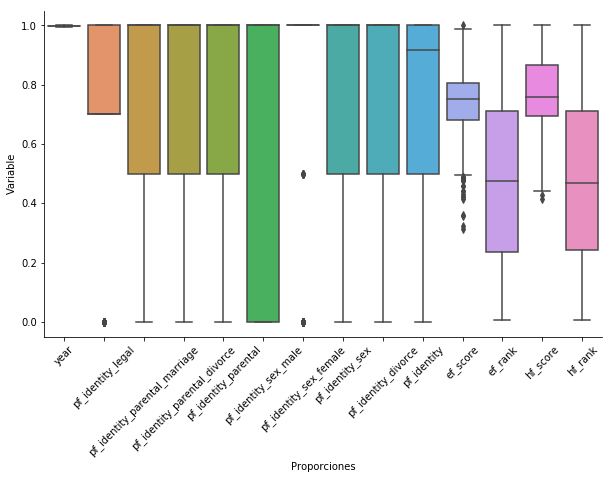

In [20]:
World_num_rel = (dataset[numerical_cols]/dataset[numerical_cols].max())

plt.figure(figsize=(10,6))
seaborn.boxplot(data=World_num_rel)
plt.ylabel('Variable')
plt.xlabel('Proporciones')
plt.xticks(rotation=45)
seaborn.despine()

Graficamente se observa que el tercer cuartil (Q3) de las variables *pf_identity* se encuentra en 1. Esto es coherente con que la moda de dichas variables sea el máximo. Por otro lado, no todos los puntos que se ven son outliers, muchos tienen que ver con que las variables toman pocos valores, por ejemplo, la variable *pf_identity_sex_male* solo toma los valores 0.0, 5.0 y 10.0, eso es lo que se observa en su "diagrama de caja", el cual no aporta más insight sobre los datos. En general los diagrama de caja de las variables *pf_identity* no tienen mucho sentido al tratarse de variables discretas que asumen pocos valores muchas veces.

Para las últimas cuatro variables los diagramas de caja sí tienen sentido y los puntos que se observan son efectivamente outliers.

El mismo gráfico para el caso de América Latina y el Caribe:

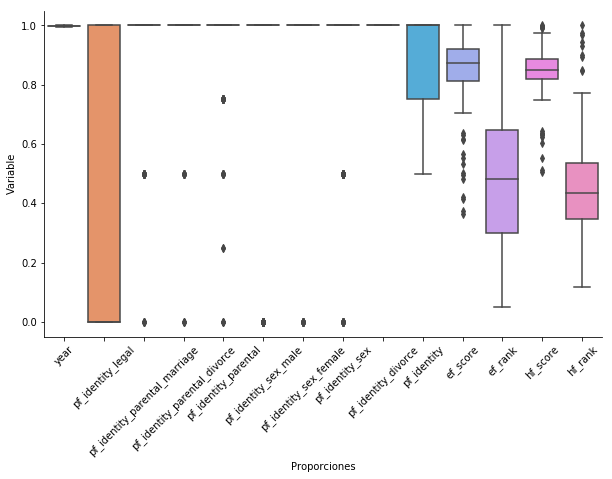

In [21]:
LAC_num_rel = (LAC_mask[numerical_cols]/LAC_mask[numerical_cols].max())

plt.figure(figsize=(10,6))
seaborn.boxplot(data=LAC_num_rel)
plt.ylabel('Variable')
plt.xlabel('Proporciones')
plt.xticks(rotation=45)
seaborn.despine()

Misma observación sobre las varaibles *pf_identity*, en este caso es más evidente.

Veamos los diagramas de caja solo de la variable *hf_score* que es lo que pregunta la consigna.

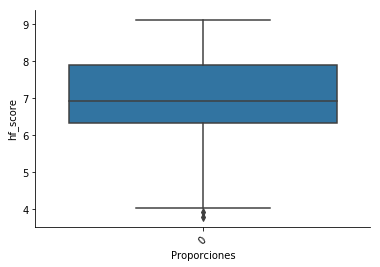

In [22]:
seaborn.boxplot(data=dataset['hf_score'])
plt.ylabel('hf_score')
plt.xlabel('Proporciones')
plt.xticks(rotation=45)
seaborn.despine()

En el *hf_score* global se ven dos outliers.

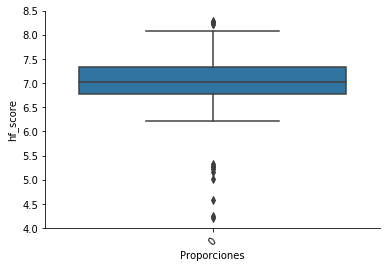

In [23]:
seaborn.boxplot(data=LAC_mask['hf_score'].tolist())
plt.ylabel('hf_score')
plt.xlabel('Proporciones')
plt.xticks(rotation=45)
seaborn.despine()

En el caso de Latino América y el Caribe, la variable *hf_score* tiene muchos más outliers

Los outliers también se pueden encontrar analíticamente estableciendo un umbral con los cuartiles y el rango intercuartil:

In [24]:
Q1 = dataset['hf_score'].quantile(0.25) # Primer cuartil
Q3 = dataset['hf_score'].quantile(0.75) # Tercer cuartil

IQR = Q3 - Q1 # Rango intercuartil

threshold = Q1 - 1.5 * IQR # El umbral

dataset['hf_score'][dataset['hf_score']<threshold]

141    3.765827
303    3.910826
Name: hf_score, dtype: float64

Esos son los dos outliers globales que veíamos en el gráfico.

In [25]:
Q1 = LAC_mask['hf_score'].quantile(0.25) # Primer cuartil
Q3 = LAC_mask['hf_score'].quantile(0.75) # Tercer cuartil

IQR = Q3 - Q1 # Rango intercuartil

threshold1 = Q1 - 1.5 * IQR # El umbral
threshold2 = Q3 + 1.5 * IQR # El umbral

LAC_mask['hf_score'][LAC_mask['hf_score']<threshold1]

157     4.200724
319     4.241750
481     4.573730
643     5.013857
805     5.225650
967     5.332458
1129    5.156619
1291    5.283514
1453    5.257879
Name: hf_score, dtype: float64

In [26]:
LAC_mask['hf_score'][LAC_mask['hf_score']>threshold2]

679     8.219911
841     8.290152
1003    8.271367
1165    8.249136
1327    8.227215
Name: hf_score, dtype: float64

En el caso de LA y el Caribe tenemos muchos más outliers. Estos son todos outliers del grupo y no globales, ya que vemos que los dos outliers globales encontrados, no pertenecen al grupo de LA y el Caribe, sino a Siria en dos años diferentes (2015 y 2016):

In [27]:
dataset.loc[[141]]

,year,ISO_code,countries,region,pf_rol_procedural,pf_rol_civil,pf_rol_criminal,pf_rol,pf_ss_homicide,pf_ss_disappearances_disap,...,ef_regulation_business_bribes,ef_regulation_business_licensing,ef_regulation_business_compliance,ef_regulation_business,ef_regulation,ef_score,ef_rank,hf_score,hf_rank,hf_quartile
141,2016,SYR,Syria,Middle East & North Africa,NaN,NaN,NaN,1.980355,9.118885,0.0,...,4.13262,NaN,6.233666,4.901109,5.444445,5.02,157.0,3.765827,162.0,4.0


In [28]:
dataset.loc[[303]]

,year,ISO_code,countries,region,pf_rol_procedural,pf_rol_civil,pf_rol_criminal,pf_rol,pf_ss_homicide,pf_ss_disappearances_disap,...,ef_regulation_business_bribes,ef_regulation_business_licensing,ef_regulation_business_compliance,ef_regulation_business,ef_regulation,ef_score,ef_rank,hf_score,hf_rank,hf_quartile
303,2015,SYR,Syria,Middle East & North Africa,NaN,NaN,NaN,2.930968,9.118885,0.0,...,4.13262,NaN,6.233666,4.929028,5.39264,4.96,154.0,3.910826,159.0,4.0


Ahora veamos quienes son los outliers de LA & C. A continuación vemos que los outliers por valores inferiores corresponden todos a Venezuela en el periodo 2008-2016, mientras que los outliers por valores superiores corresponden todos a Chile en el periodo 2008-2012.

In [29]:
LA_outliers_inf = [157, 319, 481, 643, 805, 967, 1129, 1291, 1453]

dataset.loc[LA_outliers_inf]

,year,ISO_code,countries,region,pf_rol_procedural,pf_rol_civil,pf_rol_criminal,pf_rol,pf_ss_homicide,pf_ss_disappearances_disap,...,ef_regulation_business_bribes,ef_regulation_business_licensing,ef_regulation_business_compliance,ef_regulation_business,ef_regulation,ef_score,ef_rank,hf_score,hf_rank,hf_quartile
157,2016,VEN,Venezuela,Latin America & the Caribbean,1.479799,3.271891,1.429083,2.060257,0.0,10.0,...,1.522774,4.996742,1.122213,2.009841,2.483540,2.88,162.0,4.200724,161.0,4.0
319,2015,VEN,Venezuela,Latin America & the Caribbean,1.180740,2.920870,1.347288,1.816300,0.0,10.0,...,1.559430,4.997285,1.122213,2.260861,2.564401,2.96,159.0,4.241750,157.0,4.0
481,2014,VEN,Venezuela,Latin America & the Caribbean,1.542132,3.485510,1.598302,2.208648,0.0,10.0,...,1.471166,4.998009,1.122213,2.309244,3.044655,3.28,159.0,4.573730,156.0,4.0
643,2013,VEN,Venezuela,Latin America & the Caribbean,2.500000,3.300000,1.600000,2.453968,0.0,10.0,...,2.047064,4.997828,1.122213,2.552251,3.202306,3.32,157.0,5.013857,152.0,4.0
805,2012,VEN,Venezuela,Latin America & the Caribbean,2.500000,3.300000,1.600000,2.453968,0.0,10.0,...,2.262002,4.824812,1.122213,2.652011,4.048325,3.82,153.0,5.225650,144.0,4.0
967,2011,VEN,Venezuela,Latin America & the Caribbean,3.000000,3.781688,2.369239,3.100000,0.0,10.0,...,2.534324,4.776490,1.122213,3.077042,4.358123,3.91,153.0,5.332458,145.0,4.0
1129,2010,VEN,Venezuela,Latin America & the Caribbean,3.000000,3.781688,2.369239,3.100000,0.0,5.0,...,2.976328,4.706994,0.315142,3.029234,4.188395,3.96,153.0,5.156619,150.0,4.0
1291,2009,VEN,Venezuela,Latin America & the Caribbean,3.000000,3.781688,2.369239,3.100000,0.0,10.0,...,3.060109,4.587910,0.315142,2.980275,5.431996,4.36,140.0,5.283514,137.0,4.0
1453,2008,VEN,Venezuela,Latin America & the Caribbean,3.000000,3.781688,2.369239,3.100000,0.0,10.0,...,2.784695,4.578318,0.315142,2.864160,4.666936,4.22,140.0,5.257879,136.0,4.0


In [30]:
LA_outliers_sup = [679, 841, 1003, 1165, 1327]

dataset.loc[LA_outliers_sup]

,year,ISO_code,countries,region,pf_rol_procedural,pf_rol_civil,pf_rol_criminal,pf_rol,pf_ss_homicide,pf_ss_disappearances_disap,...,ef_regulation_business_bribes,ef_regulation_business_licensing,ef_regulation_business_compliance,ef_regulation_business,ef_regulation,ef_score,ef_rank,hf_score,hf_rank,hf_quartile
679,2012,CHL,Chile,Latin America & the Caribbean,7.600000,6.100000,5.700000,6.47619,8.997097,10.0,...,7.395409,8.264831,6.738086,7.664872,7.431704,7.81,11.0,8.219911,22.0,1.0
841,2011,CHL,Chile,Latin America & the Caribbean,7.566667,6.601083,6.024559,6.70000,8.516908,10.0,...,7.552125,8.269536,6.738086,7.579189,7.727996,7.91,8.0,8.290152,19.0,1.0
1003,2010,CHL,Chile,Latin America & the Caribbean,7.566667,6.601083,6.024559,6.70000,8.726561,10.0,...,7.607779,8.248361,6.457853,7.462580,7.547727,7.89,8.0,8.271367,19.0,1.0
1165,2009,CHL,Chile,Latin America & the Caribbean,7.566667,6.601083,6.024559,6.70000,8.502624,10.0,...,7.664335,8.221577,6.457853,6.799727,7.282846,7.87,9.0,8.249136,19.0,1.0
1327,2008,CHL,Chile,Latin America & the Caribbean,7.566667,6.601083,6.024559,6.70000,8.588400,10.0,...,7.425815,8.214337,6.457853,6.724412,7.254971,7.80,13.0,8.227215,23.0,1.0


En el caso de los outliers del Mundo, se encuentra únicamente Siria como valor anómalo y su eliminación puede prestarse a debate. Por un lado, Siria en los años analizados se encuentra en situación bélica, lo que tiene sentido al no considerarse como representativo de los valores analizados. Sin embargo, al estar evaluando la libertad, se considera que el motivo enunciado no es una razón excluyente del estudio.
Del mismo modo, al analizar los outliers de la reigión America Latina y el Caribe, encontramos por un lado a Venezuela y por el otro a Chile. No se considera conveniente eliminarlos, debido a que no contamos con evidencia suficiente para afirmar que la metodología utilizada para evaluar estos países sea motivo para excluirlos del análisis, y en segundo lugar debido a que en la situación global no aparecen como outliers.

## 2. Agregación de datos

### 1. Grafiquen la media de la variable *pf_identity* y *hf_score* a través de los años.

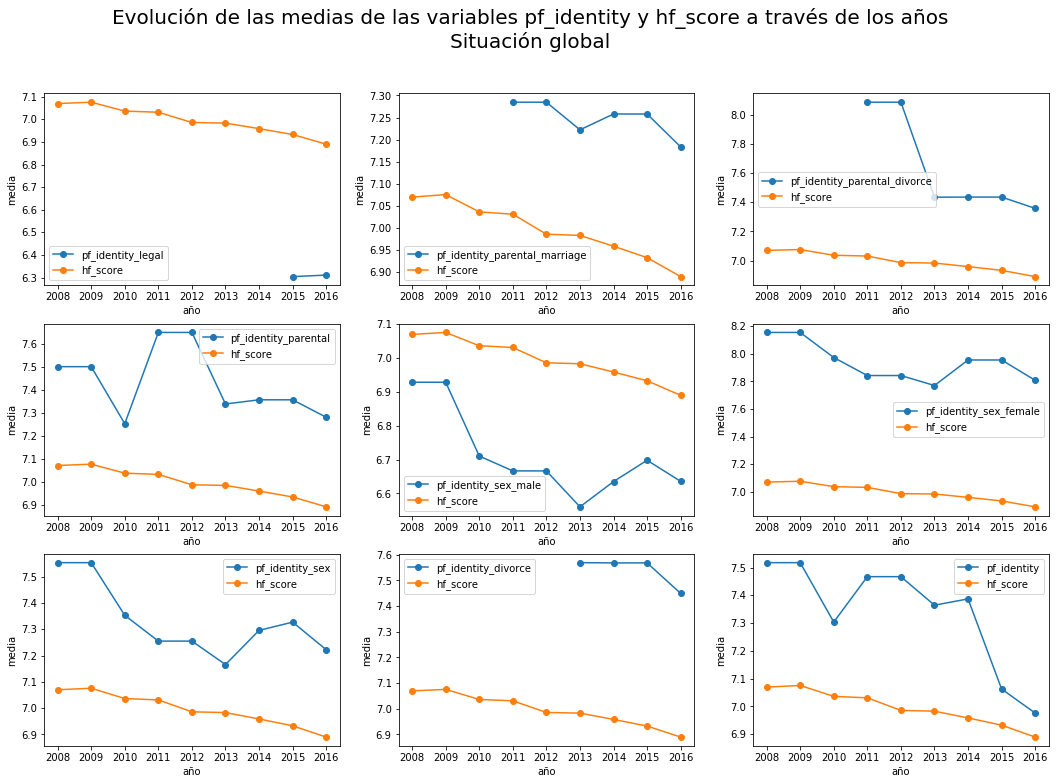

In [31]:
def nineplots(data, title):

  year2 = [y for y in range(2008, 2017)]
      
  hf_score_means = []

  for y in year2:
     hf_score_means.append(data[data['year']==y]['hf_score'].mean())

  fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(18,12))

  fig.suptitle("Evolución de las medias de las variables pf_identity y hf_score a través de los años" + "\n" + title, fontsize=20)

  n=0
  for i in range(3):
    for j in range(3):
  
      pf_identity_means = []

      for y in year2:
        pf_identity_means.append(data[data['year']==y][pf_identity_cols[n]].mean())
  
      ax[i,j].plot(year2, pf_identity_means, 'o-', label= pf_identity_cols[n])
  
      n+=1
    
      ax[i,j].plot(year2, hf_score_means, 'o-', label='hf_score')

      leg = ax[i,j].legend()

      ax[i,j].set_xlabel('año')
      ax[i,j].set_ylabel('media')

  plt.show()
  n=0
  
nineplots(dataset, "Situación global")

De las figuras anteriores, se observa una disminución en la media de *hf_score* a través de los años.

Del mismo modo, las variables *pf_identity_* decrecen en general, a pesar de observarse pequeños periodos de crecimiento.

Por último, cabe resaltar que para algunas variables *pf_identity* faltan datos de los primeros años. Inicialmente habíamos destacado que la variable *pf_identity_legal* contaba con muchos menos datos, esto se ve claramente en su gráfico.

### 2. Realicen los mismos gráficos, pero separando por regiones (cada variable en un gráfico distinto, sino no se ve nada). ¿La tendencia observada, es la misma que si no dividimos por regiones?

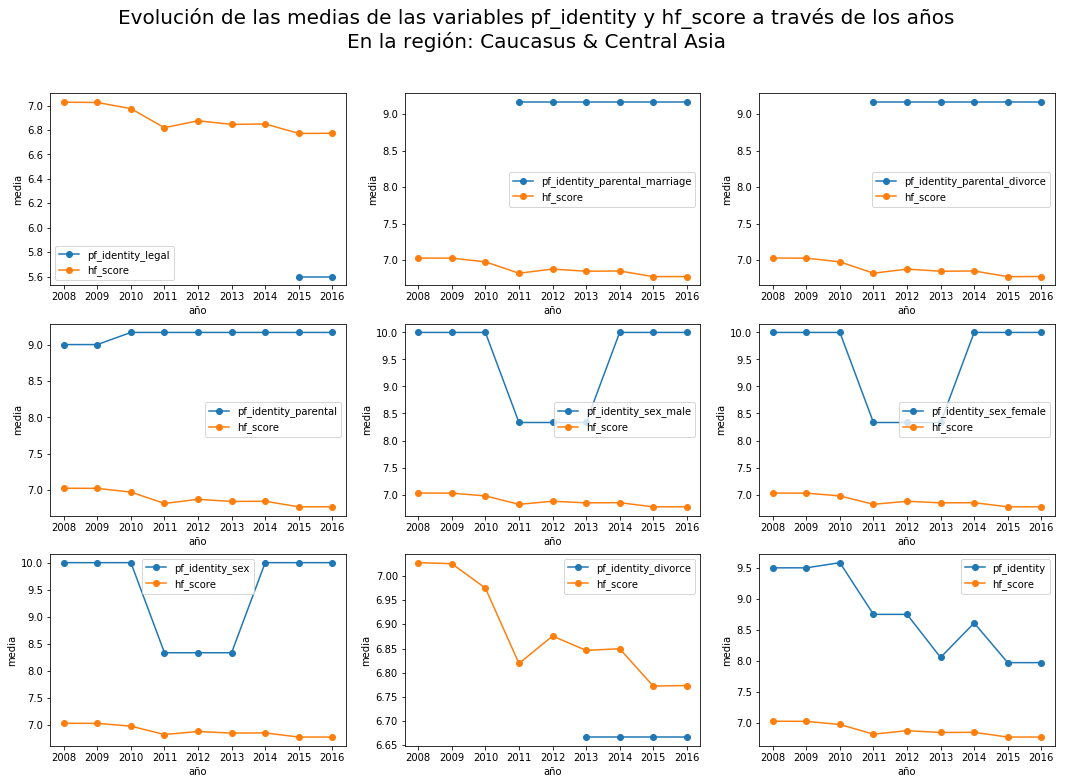

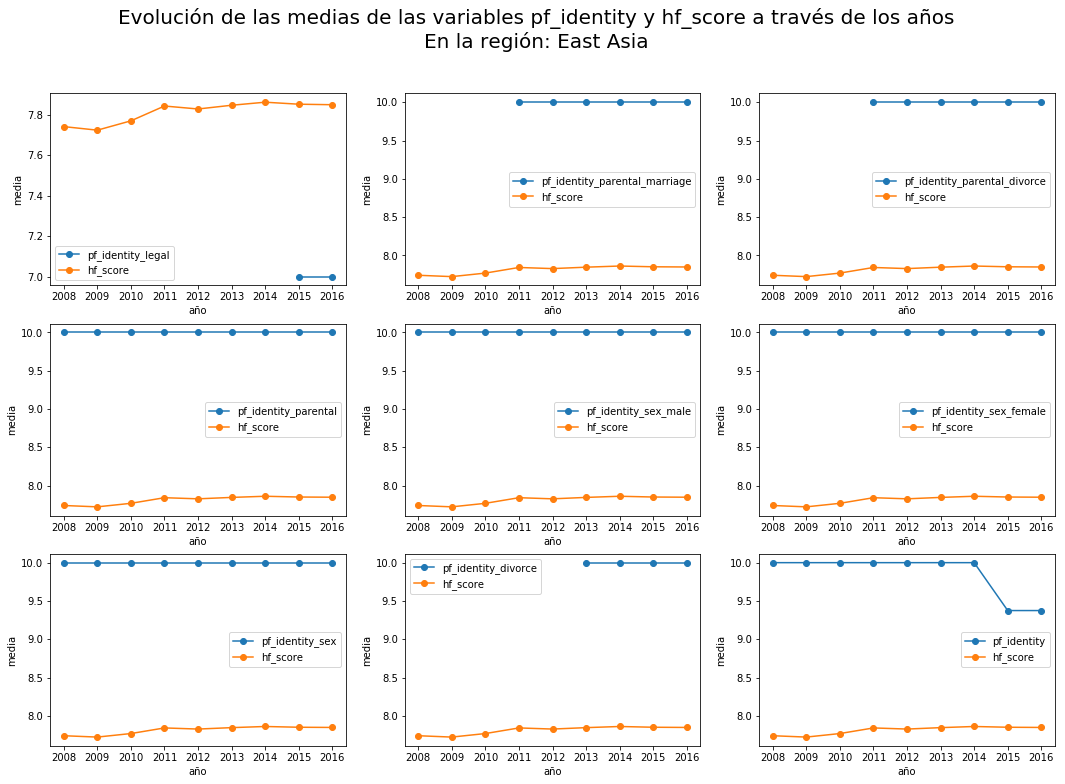

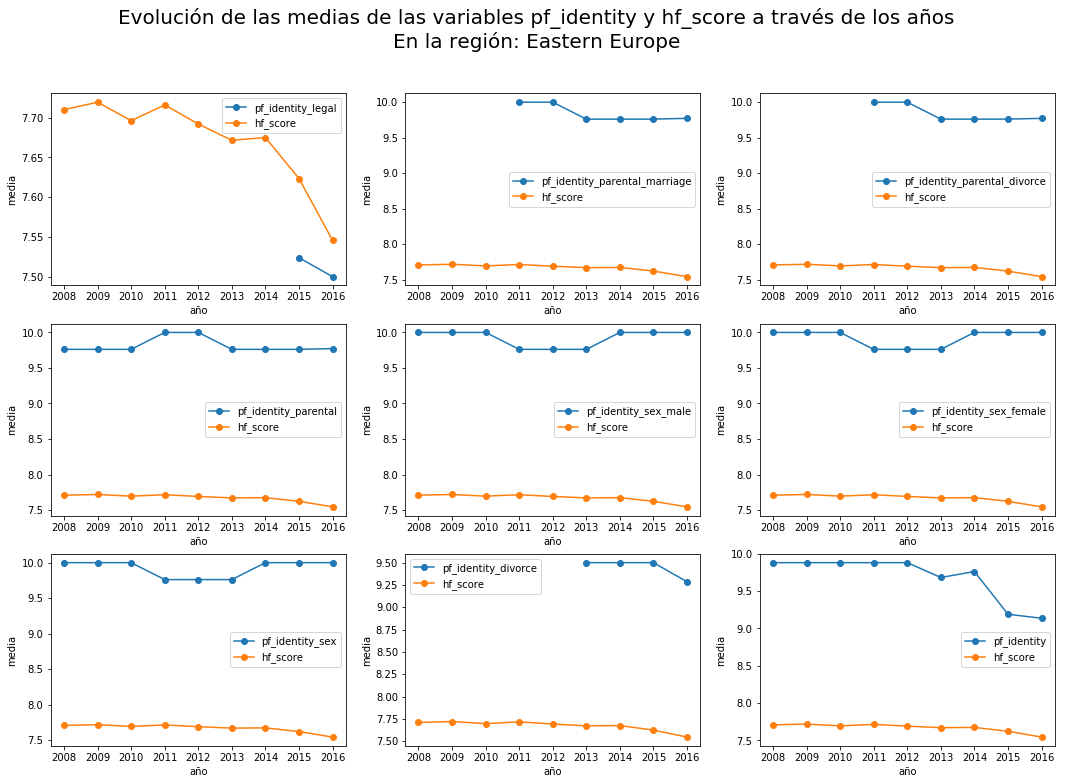

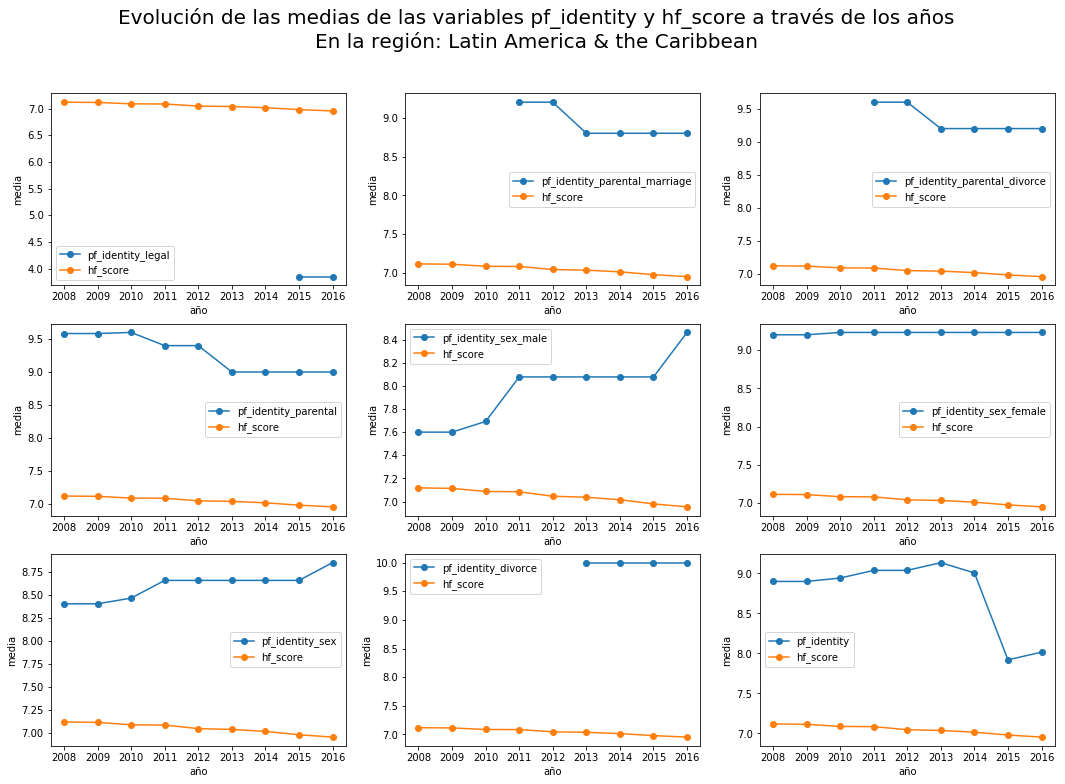

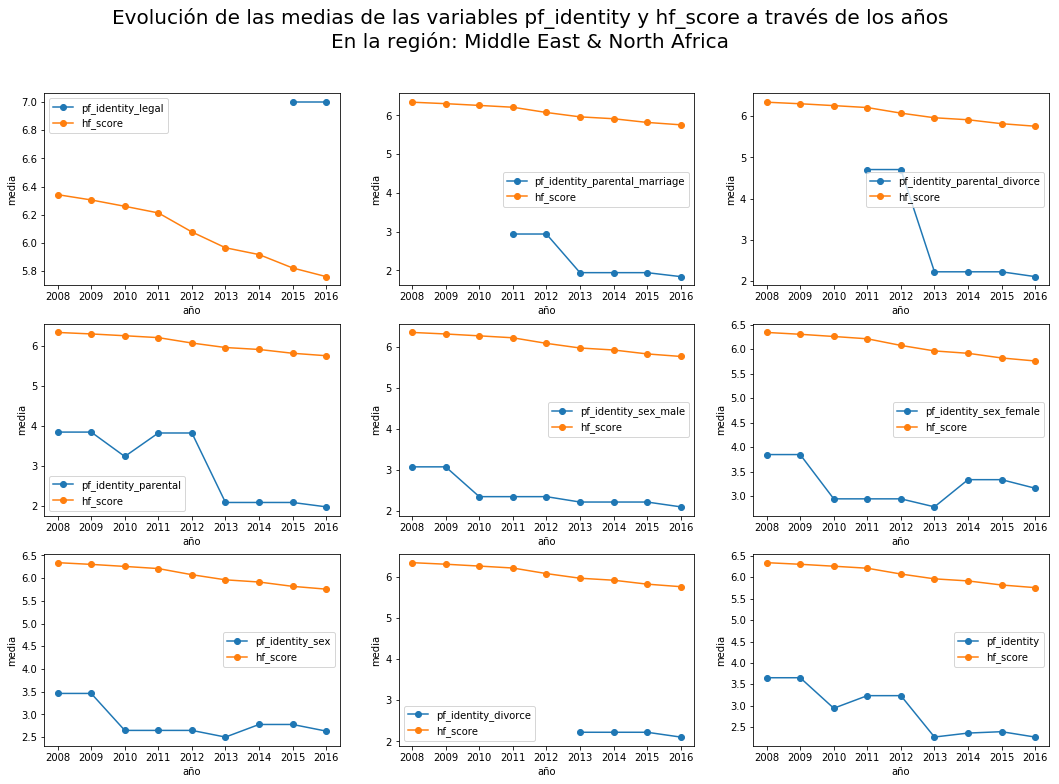

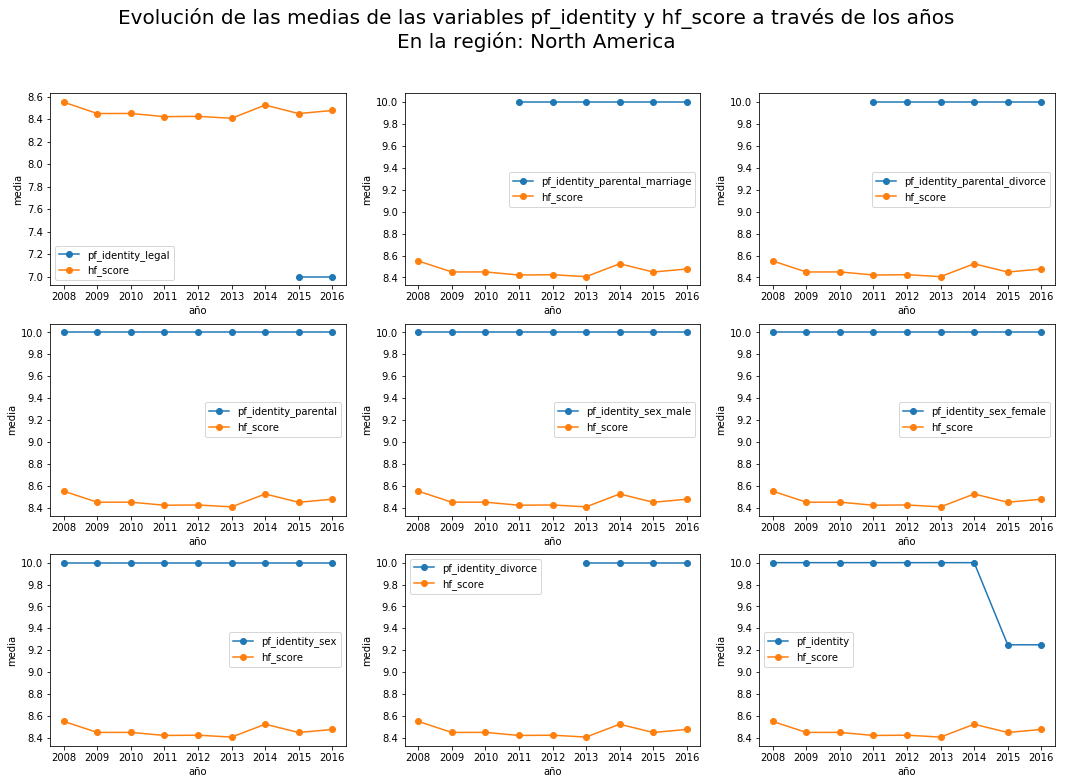

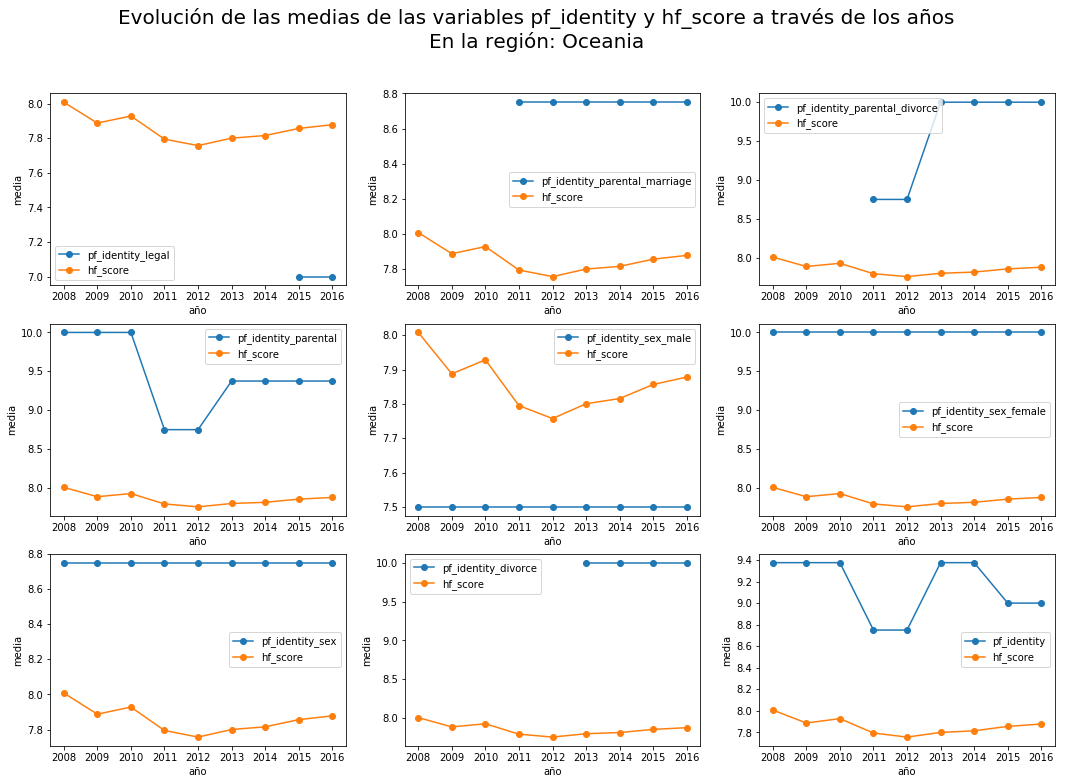

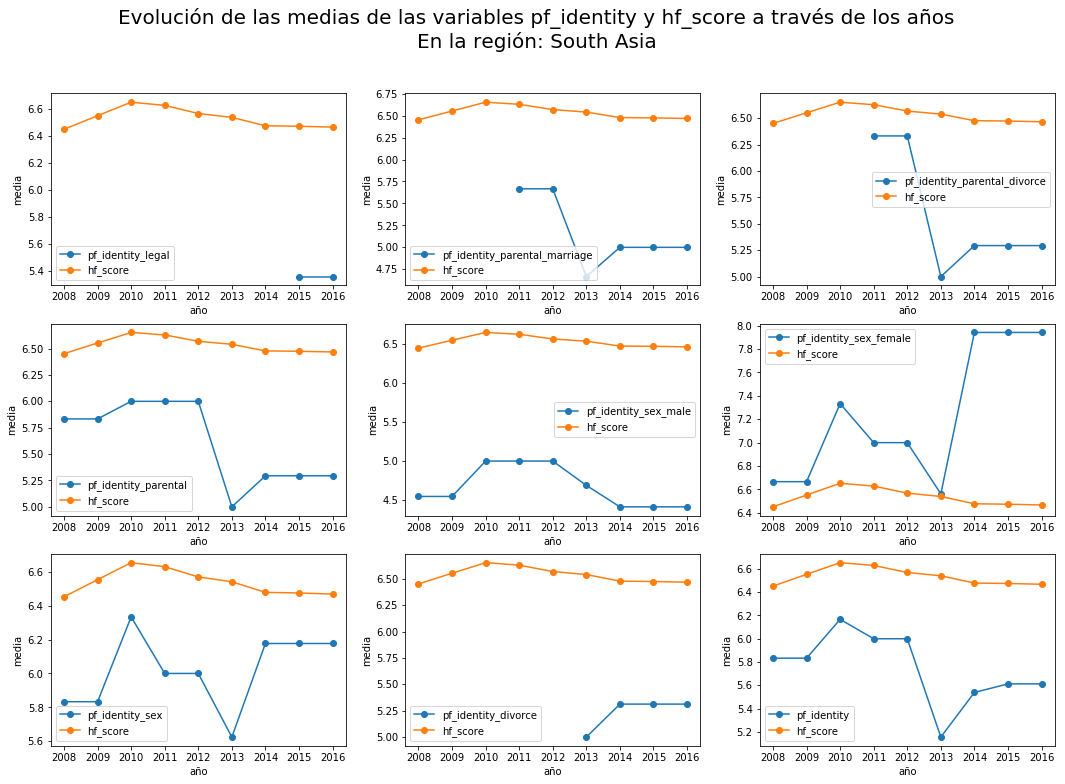

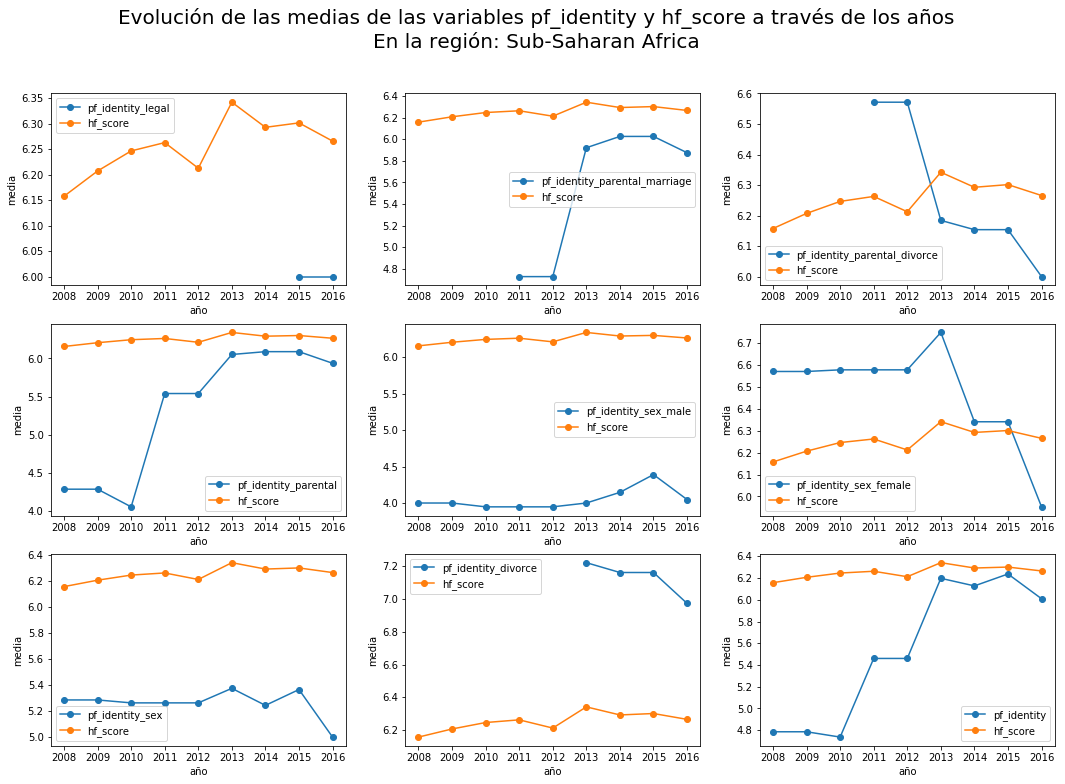

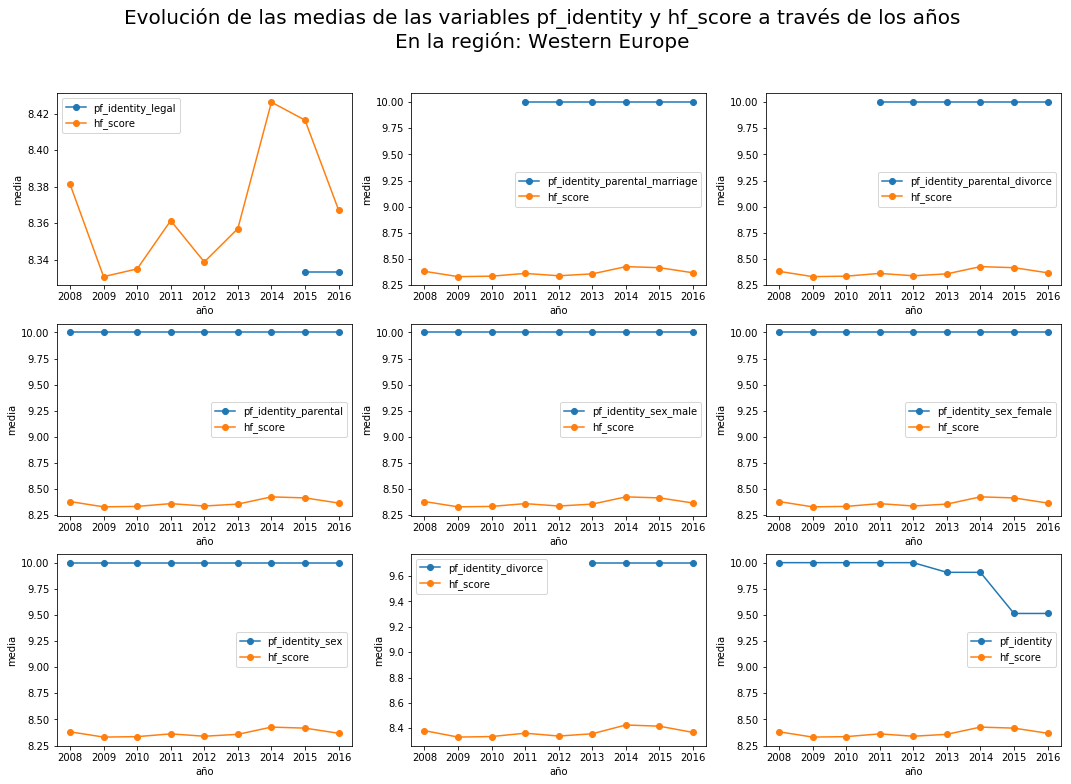

In [32]:
import warnings
warnings.filterwarnings('ignore')

regions = ['Caucasus & Central Asia',           
'East Asia',                         
'Eastern Europe',                   
'Latin America & the Caribbean',   
'Middle East & North Africa',       
'North America',                    
'Oceania',                           
'South Asia',                       
'Sub-Saharan Africa',               
'Western Europe']

for reg in regions:
  nineplots(dataset[dataset['region']==reg], "En la región: " + reg)

En los gráficos generados por el código anterior, se observa que cada región tiene su comportamiento en el tiempo particular, que no necesariamente se condicen con la situación global. 

Por ejemplo, en la región Caucasus & Central Asia se observa que las varaibles *pf_identity_sex*, *pf_identity_sex_female* y *pf_identity_sex_male* son constantes igual a 10 durante los años 2008, 2009 y 2010, luego disminuyen a 8.5 durante los años 2011, 2012 y 2013, para volver a ser 10 en los años 2014, 2015 y 2016, este comportamiento es curioso y se podría analizar qué pasó en la región en el periodo 2011-2013 que hizo desceder así  estas variables.  

Otro ejemplo, en la región East Asia, la mayoría de las variables presentan un comportamiento constante que no se condice con la situación global.

### 3. Si lo consideran necesario, grafiquen algunos países de Latinoamerica para tratar de explicar la tendencia de la variable *pf_identity* en la región. ¿Cómo seleccionarion los países relevantes a esa tendencia?

Hint: hay un gráfico de seaborn que hace todo por vos!

Sólo por curiosidad, graficar la tendencia de *hf_score* y *ef_score* a través de los años. ¿Tienen alguna hipótesis para este comportamiento?

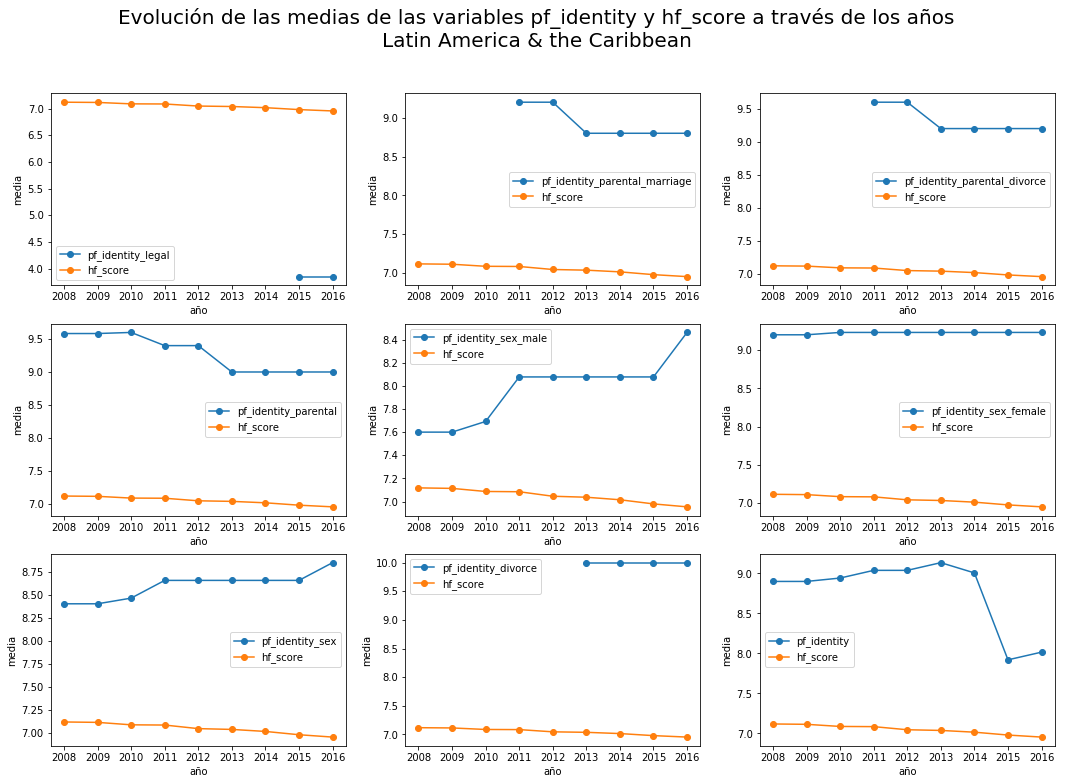

In [33]:
reg='Latin America & the Caribbean'
nineplots(dataset[dataset['region']==reg], reg)

En LA & C se ve un notable descenso de la media *pf_identity* en el año 2015. Por otro lado las variables *pf_identity_sex_male* y *pf_identity_sex* muestran una tendencia creciente, al contrario de la situación global.

Como en el ejercicio anterior vimos que Venezuela y Chile eran outliers, vamos a ver qué pasa con estos paises.

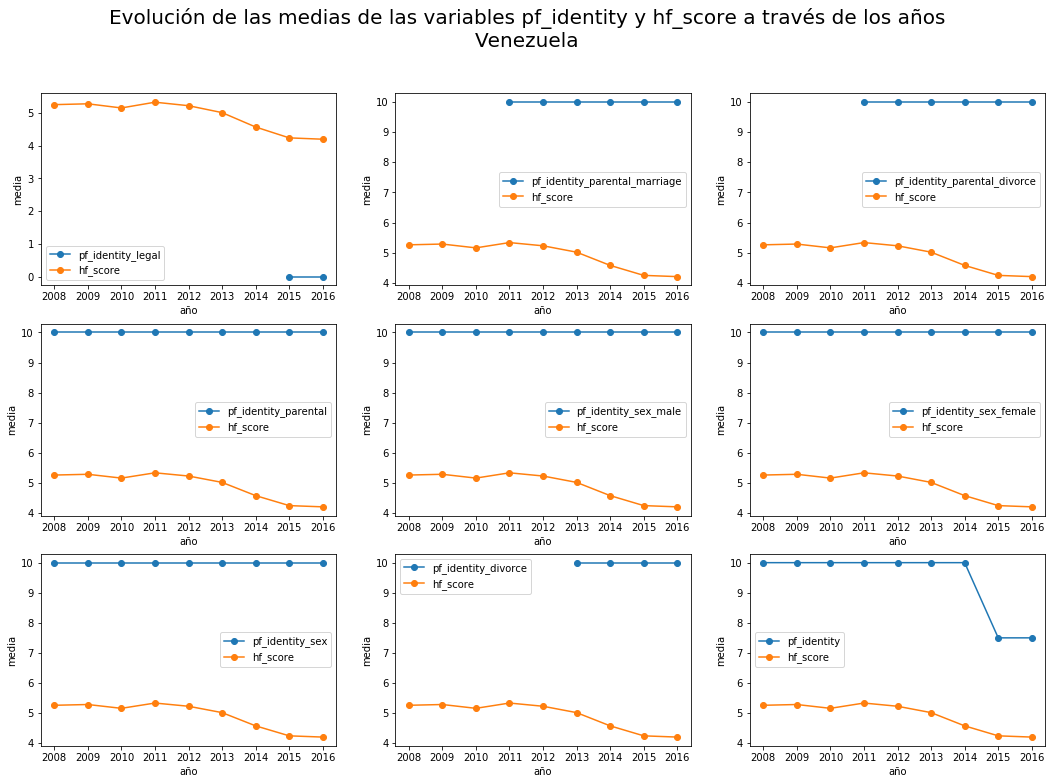

In [34]:
nineplots(dataset[dataset['ISO_code']=='VEN'], 'Venezuela')

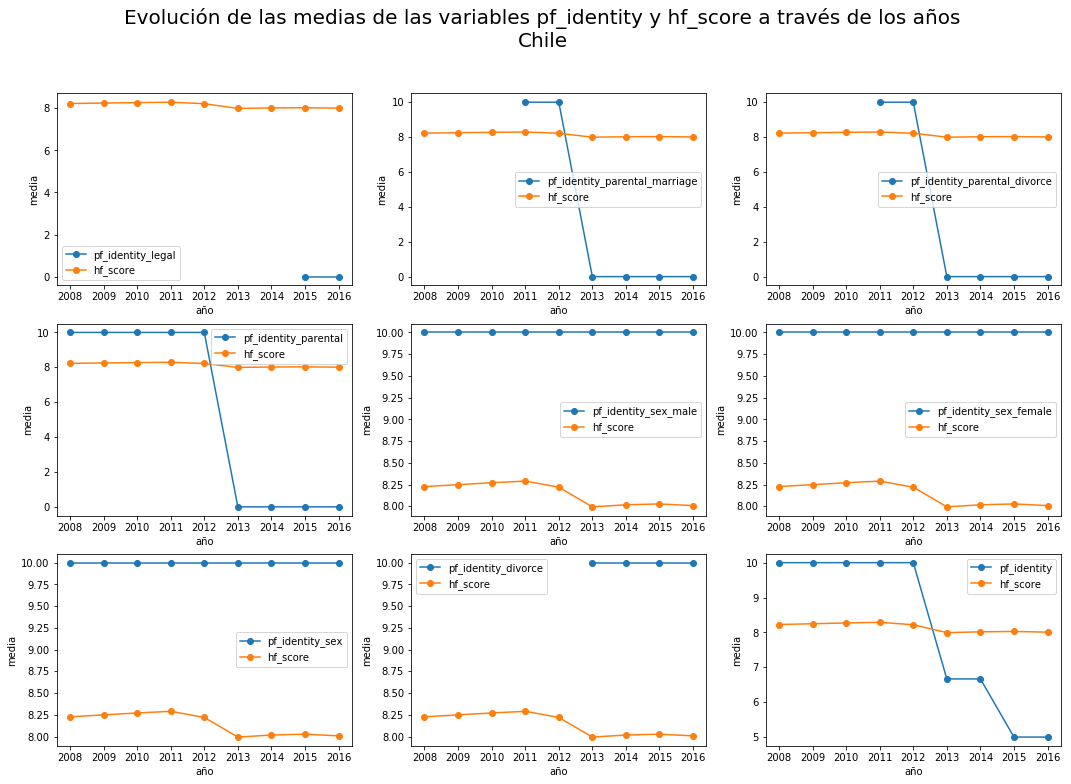

In [35]:
nineplots(dataset[dataset['ISO_code']=='CHL'], 'Chile')

En Chile se nota una notable disminución en varias variables a partir del año 2013, lo cual es coherente con lo que sabíamos de que Chile es un outlier superior entre los años 2008-2012 y después deja de serlo.

Tanto en Chile como en Venezuela la varaible *pf_identity* disminuye notablemente en el año 2015.

Vamos a ver que pasa con otros países como Brasil y Argentina.

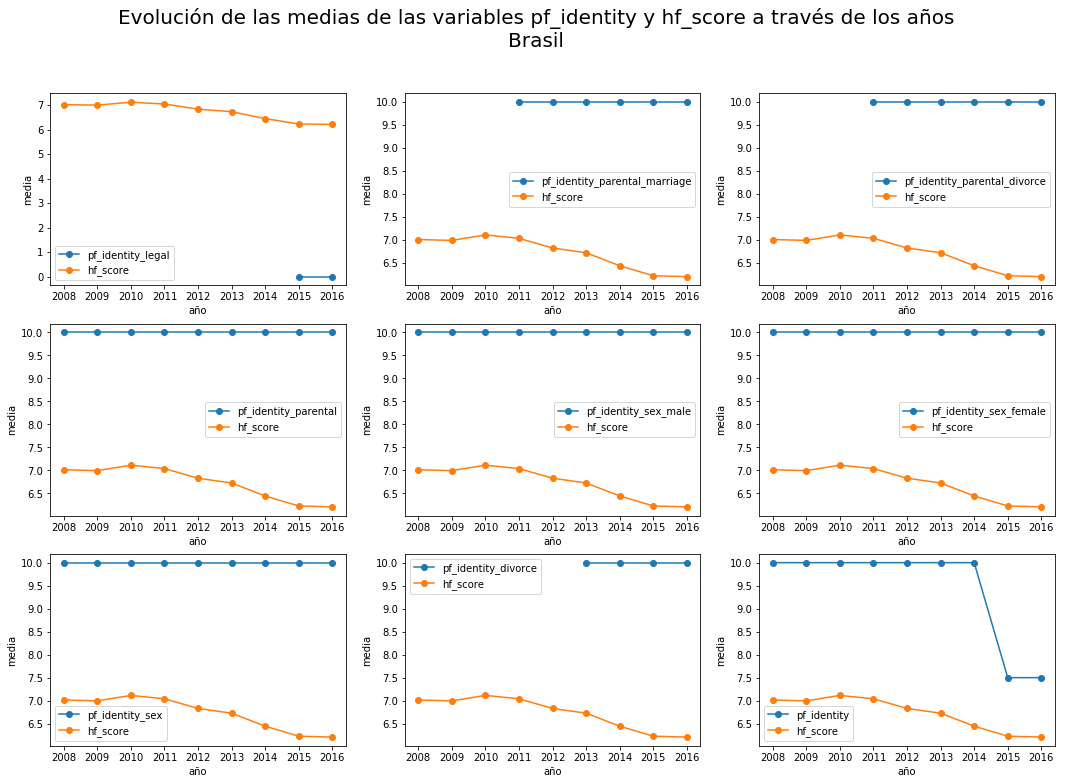

In [36]:
nineplots(dataset[dataset['ISO_code']=='BRA'], 'Brasil')

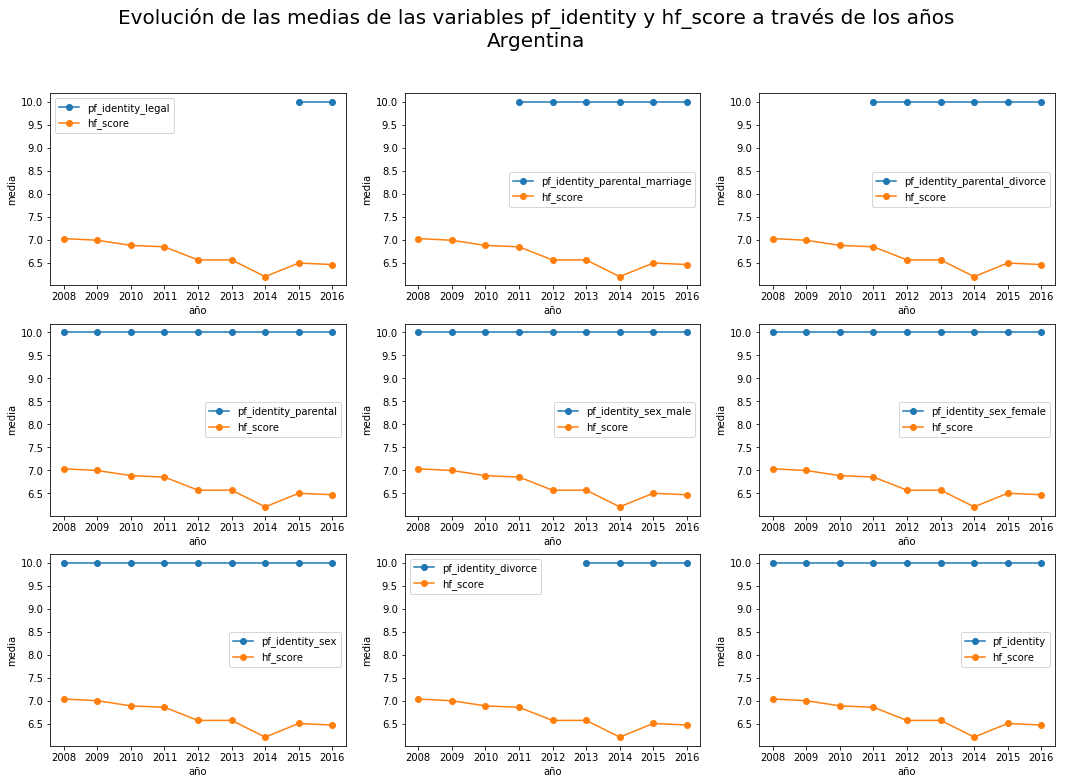

In [37]:
nineplots(dataset[dataset['ISO_code']=='ARG'], 'Argentina')

En Brasil también la varaible *pf_identity* disminuye notablemente en 2015; en Argentina, en cambio, no se percibe esta tendencia.

Ahora graficamos la tendencia de las variable *ef_score* y *hf_score* a través de los años.

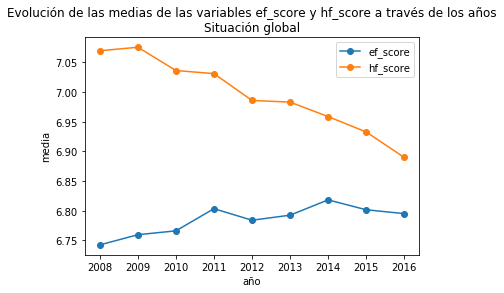

In [38]:
def anothergraph(data, title):

  year2 = [y for y in range(2008, 2017)]
      
  hf_score_means = []

  for y in year2:
     hf_score_means.append(data[data['year']==y]['hf_score'].mean())

  fig, ax = plt.subplots()

  plt.title("Evolución de las medias de las variables ef_score y hf_score a través de los años" + "\n" + title)

  ef_score_means = []

  for y in year2:
    ef_score_means.append(data[data['year']==y]['ef_score'].mean())
  
  ax.plot(year2, ef_score_means, 'o-', label='ef_score')
  
  ax.plot(year2, hf_score_means, 'o-', label='hf_score')

  leg = ax.legend()

  ax.set_xlabel('año')
  ax.set_ylabel('media')

  plt.show()
  
anothergraph(dataset, "Situación global")

Y para Latino América y el Caribe:

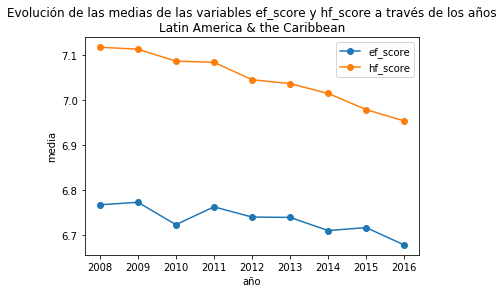

In [39]:
reg='Latin America & the Caribbean'
anothergraph(dataset[dataset['region']==reg], reg)

De los dos últimos gráficos mostrados, se observa en el mundo a lo largo de los años el índice de *libertad humana* va disminuyendo a la vez que el subíndice de *libertad económica* aumenta. Mientras que en Latino America y el Caribe, ambos índices disminuyen, y la *libertad humana* parece decrecer a una tasa mayor.

Teniendo en cuenta que el índice de *libertad humana* se basa en los subíndices de *libertad personal* y *libertad económica*, se nos presenta la hipótesis de que a nivel mundial, si bien la *libertad económica* crece, dado que la *libertad humana* disminuye, es posible que la *libertad personal* esté disminuyendo considerablemente.

A nivel LA y el Caribe, el índice de *libertad humana* dismimuye más rápido que el índice de *libertad económica*, por lo que la *libertad personal* también debe estar disminuyendo.

## 3. Distribuciones

### 1. Graficar en un mismo histograma la distribución de la variable *pf_identity* en global, y en Latinoamérica y el caribe. Repetir para la variable *hf_score*. ¿Visualmente, a qué tipo de distribución corresponde cada variable? ¿Es correcto utilizar todos los registros para esas zonas en estos gráficos?

Primero hacemos la observación de que no es conveniente utilizar todos los registros ya que se juntarian los resultados de todos los años desde el 2008 al 2016 y esto no tiene sentido, vamos a hacerlo solamente para el año 2016.

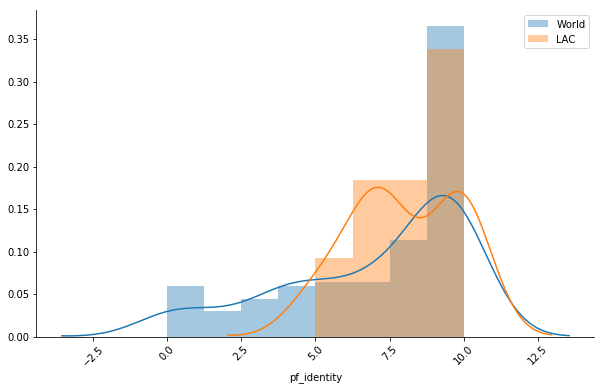

In [40]:
plt.figure(figsize=(10,6))
seaborn.distplot(
    dataset[dataset['year']==2016]['pf_identity'], bins=8, label='World')
seaborn.distplot(
    dataset[(dataset['year']==2016) & (dataset['region'] == 'Latin America & the Caribbean')]['pf_identity'],
    bins=4, label='LAC')
plt.xticks(rotation=45)
plt.legend()
seaborn.despine()

Las distribuciones son asimétricas con colas a la izquierda, podrían corresponder a una distribución normal asimétricas con skews negativas.  

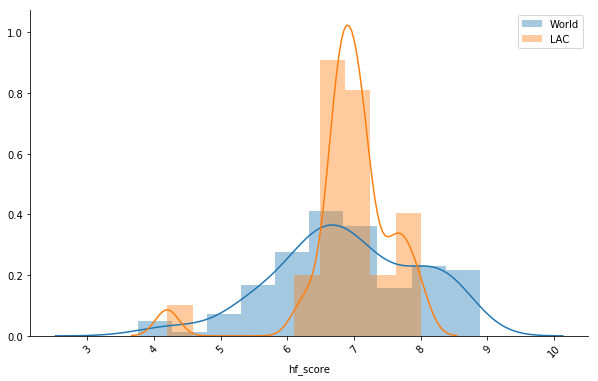

In [41]:
plt.figure(figsize=(10,6))
seaborn.distplot(
    dataset[dataset['year']==2016]['hf_score'], bins=10, label='World')
seaborn.distplot(
    dataset[(dataset['year']==2016) & (dataset['region'] == 'Latin America & the Caribbean')]['hf_score'],
    bins=10, label='LAC')
plt.xticks(rotation=45)
plt.legend()
seaborn.despine()

En este caso podríamos ver de aproximar por una normal.

### 2.Realizar una prueba de Kolmogorov-Smirnof para comprobar analíticamente si estas variables responden a la distribución propuesta en el ejercicio anterior. 

Hint: podés usar https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.kstest.html, pero hay que tener en cuenta que si la distribución es "norm", entonces va a comparar los datos con una distribución normal con media 0 y desviación estándar 1. Se puede utilizar la distribución sobre todos los datos o sólo sobre Latinoamérica.

Hipótesis nula: El conjunto de datos sigue una distribución M.

Hipótesis alternativa: El conjunto de datos NO sigue una distribución M.

In [42]:
from scipy import stats

cond1 = (dataset['region'] == 'Latin America & the Caribbean')
cond2 = (dataset['hf_score'].notnull())
cond3 = (dataset['year']==2016)

x1 = dataset[cond1 & cond2 & cond3]['hf_score']

#print(x1.mean()) # => 6.95
#print(x1.std()) # => 0.71
#print(len(x1)) # => 26

m1 = 6.95
s1 = 0.71
l1 = 26

stats.kstest(x1, 'norm', args=(m1, s1), N=l1)

KstestResult(statistic=0.234341780703869, pvalue=0.09715229761377435)

In [43]:
x2 = dataset['hf_score'][dataset['year']==2016].dropna()

#print(x2.mean()) # => 6.89
#print(x2.std()) # => 1.08
#print(len(x2)) # => 162

m2 = 6.89
s2 = 1.08
l2 = 162

stats.kstest(x2, 'norm', args=(m2, s2), N=l2)

KstestResult(statistic=0.060451462820722, pvalue=0.5882963071655365)

Como los p-valores obtenidos son mayores que el nivel de significancia (alpha = 0.05), concluimos que tanto en el caso global como en el de Latino América y el Caribe, no podemos rechazar la hipótesis nula que establece que la variable *hf_score* sigue una distribución normal.

Veamos qué pasa con la variable *pf_identity*:

In [44]:
cond1 = (dataset['region'] == 'Latin America & the Caribbean')
cond2 = (dataset['pf_identity'].notnull())
cond3 = (dataset['year']==2016)

x3 = dataset[cond1 & cond2 & cond3]['pf_identity']

#print(x3.mean()) # => 8.02
#print(x3.std()) # => 1.78
#print(len(x3)) # => 26

m3 = 8.02
s3 = 1.78
l3 = 26

# Calculamos la "skewness"

skew = stats.skew(x3)
#print(skew) # => -0.19

# Como la skewness es poca, probamos con una distribución normal:

stats.kstest(x3, 'norm', args=(m3, s3), N=l3)

KstestResult(statistic=0.2131620516926721, pvalue=0.16253045466311689)

También obtuvimos un p-valor mayor que el nivel de significancia, por lo que no podemos rechazar la hipótesis nula de normalidad.

In [45]:
x4 = dataset['pf_identity'][dataset['year']==2016].dropna()

#print(x4.mean()) # => 6.98
#print(x4.std()) # => 3.09
#print(len(x4)) # => 162

m4 = 6.98
s4 = 3.09
l4 = 162

# Calculamos la "skewness"

skew = stats.skew(x4)
#print(skew) # => -0.90

# Como la skewness es poca, probamos con una distribución normal:

stats.kstest(x4, 'norm', args=(m4, s4), N=l4)

KstestResult(statistic=0.20486595821690257, pvalue=1.9375603272870337e-06)

En este caso rechazamos la hipótesis nula, por lo que no pudimos determinar la distribución de los datos.

Sin embargo, hay que tener en cuenta que como *pf_identity* era una variable discreta, su distribución no puede ser normal, ya que esta es una distribución para variables continuas. 

Una distribución posible de estos datos podría ser una distribución Binomial (que para n grande y p no muy lejos de 0.5 se parece a una normal), para chequear este modelo tendríamos que usar un test diferente al de KS (ya que este solo se aplica a distribuciones continuas), como por ejemplo un Chi-cuadrado goodness of fit.

  ### 3. Realizar un gráfico QQ de las mismas distribuciones. Se puede utilizar ambas distribuciones sobre todos los datos o sólo sobre Latinoamérica, pero no cruzadas.
 

Un gráfico Q-Q es un diagrama de dispersión de los conjuntos de cuantiles de una muestra vs. la otra.

Si los dos conjuntos de datos tienen la misma distribución, el gráfico cuantil-cuantil es lineal. 

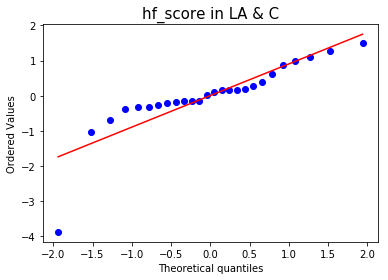

In [46]:
import pylab 

std_x1 = (x1 - m1)/s1

stats.probplot(std_x1, dist="norm", plot=pylab)
pylab.title("hf_score in LA & C", fontsize=15)
pylab.show()

A partir del gráfico anterior, los datos de *hf_score* en LA&C no parecen ajustarse bien con una distribución normal.

Ademas, el punto que representa el primer cuantil está muy alejado del resto. Creemos que puede tratarse de Venezuela.

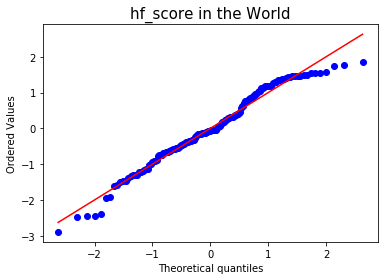

In [47]:
std_x2 = (x2 - m2)/s2

stats.probplot(std_x2, dist="norm", plot=pylab)
pylab.title("hf_score in the World", fontsize=15)
pylab.show()

En el gráfico anterior se observa que los datos de *hf_score* en el Mundo, se ajustan mejor que en la región LA&C a una distribución normal.

Cabe resaltar que los puntos que quedan por debajo de la línea roja a 45° (al principio y al final), indican asimetría hacia la izquierda (skew negativa).

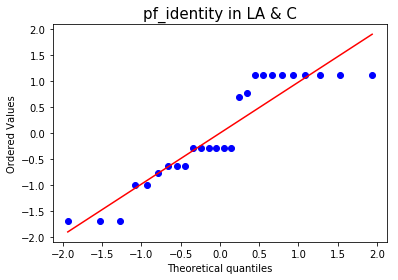

In [48]:
std_x3 = (x3 - m3)/s3

stats.probplot(std_x3, dist="norm", plot=pylab)
pylab.title("pf_identity in LA & C", fontsize=15)
pylab.show()

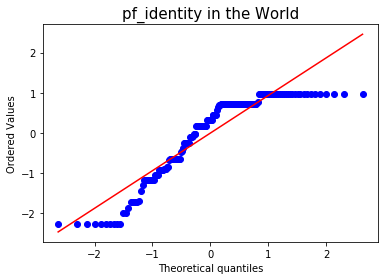

In [49]:
std_x4 = (x4 - m4)/s4

stats.probplot(std_x4, dist="norm", plot=pylab)
pylab.title("pf_identity in the World", fontsize=15)
pylab.show()

A pesar de que con el test de KS para la variable *pf_identity* no pudimos rechazar normalidad en la región de LA & C. En los gráficos anteriores de QQ-plots, se deduce que las distribuciones de la región LA&C y del Mundo, no parecen seguir la distribuión normal. 

Además, se observa en las últimas dos figuras que la variable *pf_identity* los datos se agrupan en lineas horizontales de puntos. Esto se interpreta como que el mismo valor de la variable coincide con más de una categoría de cuantil. La causa de esto es que *pf_identity* es una variable discreta, que funciona como una categórica (los valores se repiten muchas veces). De este modo, queda en evidencia que al ser *pf_identity* una variable discreta, no puede seguir una distribución normal, que corresponde a distribuciopnes continuas.

  ### 4. Medir la asimetría (skew) y curtosis de las mismas distribuciones con las que realizó el gráfico anterior. ¿Cómo se relacionan estos estadísticos con la forma del gráfico QQ obtenido previamente? ¿El gráfico QQ provee más información que no esté presente en estos estadísticos?

In [50]:
skew1 = stats.skew(x1)
print("LA & C, hf_score skew: ", skew1) 

skew2 = stats.skew(x2)
print("World, hf_score skew: ", skew2) 

skew3 = stats.skew(x3)
print("LA & C, pf_identity skew: ", skew3) 

skew4 = stats.skew(x4)
print("World, pf_identity skew: ", skew4) 

LA & C, hf_score skew:  -2.1410693012642286
World, hf_score skew:  -0.29333571023556415
LA & C, pf_identity skew:  -0.18929181622510904
World, pf_identity skew:  -0.8951480567448604


En todos los casos la skew es negativa, esto indica una asimetría hacia la izquierda. 

La "skewness" (o asimetría), también puede observarse en el QQ-plot. Cuando existe asimetría hacía la izquierda los puntos correspondientes a los primeros y/o últimos cuantiles suelen ubicarse por debajo de la línea teórica a 45° (en todos los graficos del punto anterior ocurre esto). Mientras que si la asimetría es hacia la derecha (skew positiva), estos puntos estarán por encima de dicha línea.

In [51]:
kur1 = stats.kurtosis(x1)
print("LA & C, hf_score kurtosis: ", kur1) 

kur2 = stats.kurtosis(x2)
print("World, hf_score kurtosis: ", kur2) 

kur3 = stats.kurtosis(x3)
print("LA & C, pf_identity kurtosis: ", kur3) 

kur4 = stats.kurtosis(x4)
print("World, pf_identity kurtosis: ", kur4) 

LA & C, hf_score kurtosis:  7.186216577063947
World, hf_score kurtosis:  -0.21930964615720816
LA & C, pf_identity kurtosis:  -1.2716537015157754
World, pf_identity kurtosis:  -0.376609391263361


La curtosis indica que tan achatada o empuntada es una distribución del tipo normal. Si bien, como ya indicamos, las distribuciones de las variables analizadas no corresponden a la normal en la mayoría de los casos, el estudio de la curtosis nos indica características de las distribuciones de las frecuencias de datos en el espacio muestral.

Es así que se interpreta que una curtosis positiva indica una distribución más empuntada que la distribución normal y con colas extensas. Del mismo modo, una curtosis negativa indica una distribución más achatada y con colas próximas a la media.

La curtosis más alta la tiene la variable *hf_score* para el grupo LA & C. Esto indica una mayor concentración de valores de la variable tanto muy cerca de la media de la distribución (pico), como muy lejos de ella (colas), al tiempo que existe una relativamente menor frecuencia de valores intermedios. Esto coincide con el gráfico que obtuvimos para estos datos en el primer inciso. Hay que tener en cuenta que una mayor curtosis no implica una mayor varianza, ni viceversa (de hecho este grupo de datos es el de menor varianza).

Los otros tres grupos obtuvieron curtosis negativa. Una curtosis negativa indica una distribución menos apuntada y con colas menos extensas que la normal.

## 4. Correlaciones

En este ejercicio queremos responder a las preguntas

* Las libertades sociales y económicas, ¿van siempre de la mano?
* ¿Cómo se relacionan ambas con las libertades individuales y respectivas a las relaciones personales?

Para ello, analizaremos las correlaciones entre las variables pf_identity, hf_score y ef_score. 

Como pf_indentity contribuye al cálculo de hf_score y ef_score, esperamos hallar algún grado de correlación. Sin embargo, queremos medir qué tanta correlación. 

### 1. ¿Qué conclusiones puede sacar de un gráfico pairplot de estas tres variables? ¿Es adecuado para los valores de pf_identity? ¿Por qué?

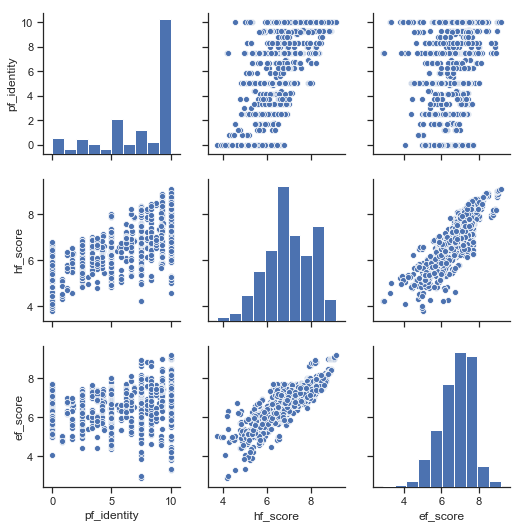

In [52]:
seaborn.set(style="ticks", color_codes=True)
seaborn.pairplot(dataset[['pf_identity', 'hf_score', 'ef_score']])

Se observa que hay una correlación positiva entre  las varaibles *hf_score* y *ef_score*. 

Los diagramas que involucran a la variable *pf_identity* se ven muy mal, esto tiene que ver con que se trata de una variable que puede ser interpretada como una variable categórica (toma una cantidad finita de valores repetidas veces). Por lo tanto este tipo de diagramas no son adecuados para esta variable.

### 2. Graficar la correlación entre pf_identity y hf_score; y entre pf_identity y ef_score. Analizar el resultado, ¿se pueden sacar conclusiones? Tengan en cuenta que como pf_identity es el resultado de un promedio, sólo toma algunos valores. Es, en efecto, discreta.


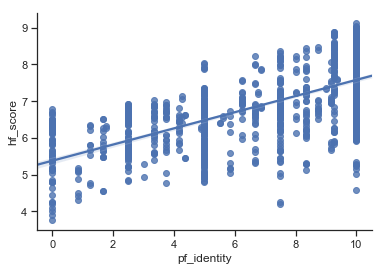

In [53]:
seaborn.regplot(x='pf_identity', y='hf_score', data=dataset)
seaborn.despine()

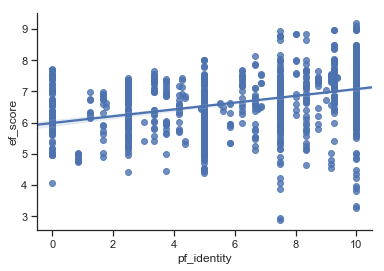

In [54]:
seaborn.regplot(x='pf_identity', y='ef_score', data=dataset)
seaborn.despine()

Como *pf_identity* toma pocos valores repetidas veces, estos gráficos no quedan bien y por lo tanto no podemos sacar conclusiones de ellos.

### 3. Calcular algún coeficiente de correlación adecuado entre los dos pares de variables, dependiendo de la cantidad de datos, el tipo de datos y la distribución de los mismos. Algunas opciones son: coeficiente de pearson, coeficiente de spearman, coeficientes de tau y de kendall. Interpretar los resultados y justificar si las variables están correlacionadas o no. 


El coeficiente de correlación de Pearson asume que las variables deben provenir de una población normal. Como *pf_identity* es una variable discreta, no sigue una distribución normal, se propone aplicar el coeficiente de correlación de Spearman que es no paramétrico. Es decir, no tiene en cuenta la distribución de la cuál provengan los datos.

In [55]:
x = dataset['pf_identity'].dropna()
y = dataset['hf_score'].dropna()
z = dataset['ef_score'].dropna()

stats.spearmanr(x, y)

SpearmanrResult(correlation=0.6861094212039192, pvalue=2.3804640834918467e-192)

In [56]:
stats.spearmanr(x, z)

SpearmanrResult(correlation=0.4269934752976421, pvalue=3.6044427282609636e-62)

In [57]:
stats.spearmanr(y, z)

SpearmanrResult(correlation=0.8606467585473372, pvalue=0.0)

Vemos que hay una correlación positiva muy grande entre  el índice de libertad humana y el índice de libertad económica. También hay una buena correlación, aunque menor, entre el índice de libertad humana y *pf_identity*. Por otro lado, la correlación entre el índice de libertad económica y *pf_identity* es moderada.

Por último, cabe señalar que todos los p-valores dieron menor que 0.0001 indicando que los coeficientes de correlación son significativamente no nulos, pues rechazamos la hipótesis nula que establese que son iguales a cero.

### 4. [Opcional] Analizar la correlación entre la region y el hf_score (y/o el ef_score); y entre la region y el pf_identity. Considerar que como la variable *region* es ordinal, debe utilizarse algún tipo de test. Explicar cuáles son los requisitos necesarios para la aplicación de ese test. (Si no se cumplieran, se pueden agregar algunos datos para generar más registros)

### Test Chi-cuadrado de independencia
 
Como habíamos visto, la variable *pf_identity* puede interpretarse como una variable categórica. Como *region* también es una variable categórica, para comparar estas dos variables lo más apropiado es usar un Test Chi-cuadrado de independencia.

Uno de los requisitos para poder aplicar este test es que debe haber diferentes elementos en cada grupo y ningún elemento debe estar en más de un grupo. En nuestro caso, cada país solo puede tener una *region*, pero para distintos años tenemos distintos valores de *pf_identity* para el mismo país, por lo que nos quedamos solo con el año 2016 para que se cumplan los requisitos del test.


In [71]:
dataset['region'][dataset['year']==2016].value_counts()

Sub-Saharan Africa               42
Latin America & the Caribbean    26
Eastern Europe                   22
Middle East & North Africa       19
Western Europe                   18
South Asia                       17
Caucasus & Central Asia           6
East Asia                         6
Oceania                           4
North America                     2
Name: region, dtype: int64

In [72]:
dataset['pf_identity'][dataset['year']==2016].value_counts()

9.250000     36
10.000000    33
7.500000     12
0.000000     10
5.000000     10
3.333333      7
6.250000      6
8.000000      6
8.333333      5
1.666667      4
4.166667      4
6.875000      3
6.666667      3
3.750000      3
9.166667      2
4.375000      2
0.833333      2
4.250000      2
4.875000      1
1.250000      1
8.750000      1
1.750000      1
6.750000      1
5.500000      1
3.000000      1
5.833333      1
9.000000      1
9.375000      1
2.500000      1
5.625000      1
Name: pf_identity, dtype: int64

Recordemos que estamos interesados en saber si existe una relación entre *region* y *pf_identity*. Para hacerlo, tendríamos que utilizar la prueba de Chi cuadrado. Pero primero, establezcamos nuestra hipótesis nula y la hipótesis alternativa.

Hipotesis nula: No existe una relación estadísticamente significativa entre la *region* y la variable *pf_identity*.

Hipotesis alternativa: Existe una relación estadísticamente significativa entre la *region* y la variable *pf_identity*.

In [87]:
# Construcción de la tabla de contingencia
contingency_table = pd.crosstab(
    dataset['region'][dataset['year']==2016],
    dataset['pf_identity'][dataset['year']==2016],
    margins = True
)
contingency_table

pf_identity,0.0,0.833333333,1.25,1.6666666669999999,1.75,2.5,3.0,3.333333333,3.75,4.166666667,...,7.5,8.0,8.333333332999999,8.75,9.0,9.166666667000001,9.25,9.375,10.0,All
region,,,,,,,,,,,,,,,,,,,,,
Caucasus & Central Asia,0,0,0,0,0,0,0,0,0,0,...,0,3,1,0,0,0,1,0,0,6
East Asia,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,5,0,1,6
Eastern Europe,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,12,0,6,22
Latin America & the Caribbean,0,0,0,0,0,0,0,0,0,0,...,6,0,0,0,0,0,1,1,9,26
Middle East & North Africa,8,2,0,1,0,0,1,4,0,1,...,0,0,0,0,0,0,1,0,1,19
North America,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,0,2
Oceania,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,2,0,1,4
South Asia,0,0,1,1,1,0,0,0,2,0,...,0,1,1,0,0,0,1,0,2,17
Sub-Saharan Africa,2,0,0,2,0,1,0,3,1,3,...,5,1,3,0,0,2,1,0,6,42


Para poder aplicar el test acomodamos los valores observados en una matriz

In [89]:
f_obs = np.array([contingency_table.iloc[i][0:30].values for i in range(10)])
f_obs

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  1,  0,  0,  0,  0,  3,  1,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  5,  0,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  1,  0,  1,  0,  0,  1,  0,  0,  1,  0, 12,  0,  6],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  3,  0,  0,
         0,  2,  1,  0,  3,  6,  0,  0,  0,  0,  0,  1,  1,  9],
       [ 8,  2,  0,  1,  0,  0,  1,  4,  0,  1,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  2,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  2,  0,  1],
       [ 0,  0,  1,  1,  1,  0,  0,  0,  

In [90]:
stats.chi2_contingency(f_obs)[0:3]

(371.6288965879122, 7.888544038614075e-06, 261)

Estos tres valores corresponden al estadístico de prueba, p-valor y grados de libertad respectivamente.

Como obtuvimos un p-valor menor que el nivel de significancia 0.0001, rechazamos la hipotesis nula y concluimos que existe una relación estadísticamente significativa entre la *region* y la variable *pf_identity*.